## EDA

In [1]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

plt.style.use('seaborn-v0_8-darkgrid')

In [3]:
ais_df = pd.read_csv(r"D:\Projects\Hackathon\Agentic Hackathon\data\raw\ais_dummy\ais_bulk_2012_2017_2022\AIS_2019_01_01.csv")
print(ais_df.head(5))
# Select only the first 4 Cols
small_df = ais_df.iloc[:, : 4]
print(small_df.head(5))
# Convert to Date object
small_df['BaseDateTime'] = pd.to_datetime(small_df['BaseDateTime'])
# Sorting
small_df_s = small_df.sort_values(['MMSI', 'BaseDateTime'], ascending=[True, True])

        MMSI         BaseDateTime       LAT        LON  SOG    COG  Heading  \
0  338208626  2019-01-01T00:00:05  37.86505 -122.31405  0.0 -165.0    511.0   
1  367420490  2019-01-01T00:00:04  31.26095  -91.65160  4.5   15.0     31.0   
2  338060122  2019-01-01T00:00:04  30.67109  -81.46722  1.9  -67.4    511.0   
3  368018190  2019-01-01T00:00:04  30.70736  -88.04332  0.0 -103.6    301.0   
4  368039230  2019-01-01T00:00:04  35.08305  -90.14214  0.0 -182.3      4.0   

  VesselName  IMO CallSign  VesselType  Status  Length  Width  Draft  Cargo  \
0        NaN  NaN      NaN         NaN     0.0     NaN    NaN    NaN    NaN   
1        NaN  NaN      NaN         NaN    15.0     NaN    NaN    NaN    NaN   
2        NaN  NaN      NaN         NaN     0.0     NaN    NaN    NaN    NaN   
3        NaN  NaN      NaN         NaN     0.0     NaN    NaN    NaN    NaN   
4        NaN  NaN      NaN         NaN     0.0     NaN    NaN    NaN    NaN   

  TranscieverClass  
0                B  
1       

In [4]:
def animate(list_of_boats,min_i=1000):
    fig, ax = plt.subplots()
    line, = ax.plot([], [], lw=2)

    x_list = []
    y_list = []
    
    for (x,y) in list_of_boats:
        x_list.append(x[:min_i]) 
        y_list.append(y[:min_i])

    lines = []
    for index in range(len(list_of_boats)):
        lobj = ax.plot(x_list[index],y_list[index],lw=4)[0]
        lines.append(lobj)

    def init():
        line.set_data([], [])
        return line,
    def animate(i):
        x_list = []
        y_list = []
        for (x,y) in list_of_boats:
            x_list.append(x[:i]) 
            y_list.append(y[:i])

        for lnum,line in enumerate(lines):
            line.set_data(x_list[lnum], y_list[lnum]) # set data for each line separately. 
            
        # recompute the ax.dataLim
        ax.relim()
        # update ax.viewLim using the new dataLim
        ax.autoscale_view()
        
        return lines


    anim = FuncAnimation(fig, animate,frames=200, init_func=init, blit=True)
    plt.close(fig)
    return anim

def viz(nbody=2,MMSIS=None):
    list_of_boats = []
    anims = []
    if MMSIS == None:
        MMSIS = random.sample(small_df_s.MMSI.unique().tolist(),nbody)
    for MMSI in MMSIS:
        print(MMSI)
        boat = small_df_s.loc[small_df_s['MMSI'] == MMSI]
        x = boat['LAT'].tolist()
        y = boat['LON'].tolist()
        list_of_boats.append((x[:1000],y[:1000]))
        if nbody < 3:
            anims.append(animate([(x[:1000],y[:1000])]))
    anims.append(animate(list_of_boats))
    return anims,list_of_boats

anims,_ = viz()

316004658
316009841


In [5]:
import matplotlib.animation as animation
print(animation.writers.list())

['pillow', 'ffmpeg', 'ffmpeg_file', 'html']


In [6]:
import matplotlib as mpl
from IPython.display import HTML

# Correct path (full path to the .exe, not just the folder)
mpl.rcParams['animation.ffmpeg_path'] = r"D:\Installers\ffmpeg\ffmpeg-master-latest-win64-gpl-shared\bin\ffmpeg.exe"

import matplotlib.animation as animation
print(animation.writers.list())  # Should list ffmpeg if correctly configured

mpl.rcParams['animation.writer'] = 'ffmpeg'


['pillow', 'ffmpeg', 'ffmpeg_file', 'html']


In [7]:
print("Boat 2")
HTML(anims[1].to_html5_video())

Boat 2


In [8]:
print("Boats 1 (Green) and 2 (Red)")
HTML(anims[-1].to_html5_video())

Boats 1 (Green) and 2 (Red)


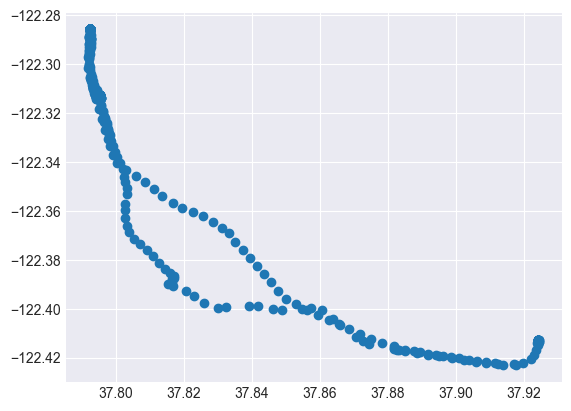

In [9]:
first_ship = small_df_s.loc[small_df_s['MMSI'] == 827396670]
y = first_ship['LON'].tolist()
x = first_ship['LAT'].tolist()
plt.scatter(x,y)
plt.show()

367106130


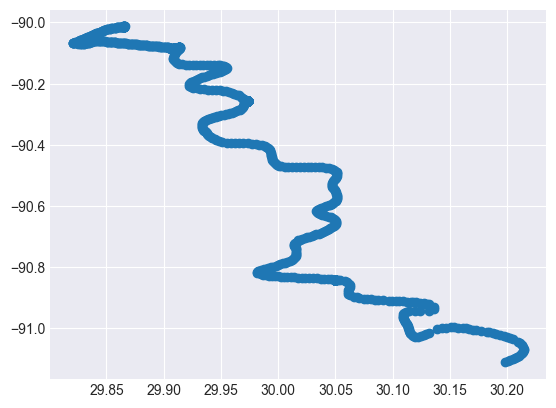

In [10]:
ind = small_df_s['MMSI'][109]
print(ind)
second_ship = small_df_s.loc[small_df_s['MMSI'] == ind]
y2 = second_ship['LON'].tolist()
x2 = second_ship['LAT'].tolist()
plt.scatter(x2,y2)
plt.show()

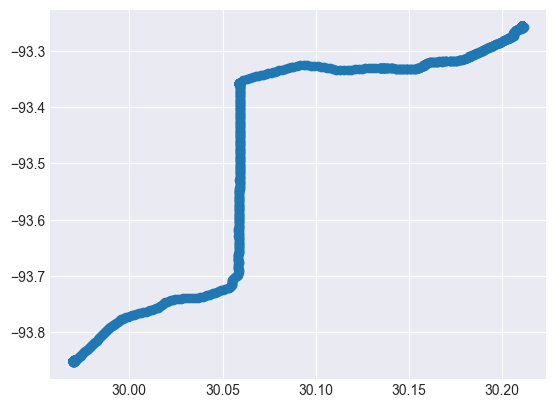

In [11]:
third_ship = small_df_s.loc[small_df_s['MMSI'] == 367551680]
y3 = third_ship['LON'].tolist()
x3 = third_ship['LAT'].tolist()
plt.scatter(x3,y3)
plt.show()

In [12]:
list_of_boats = [(x[:1000],y[:1000]),(x2[:1000],y2[:1000]),(x3[:1000],y3[:1000])]

## Animation of Data 

In [13]:
def animate(list_of_boats,min_i=1000):
    fig, ax = plt.subplots()
    line, = ax.plot([], [], lw=2)

    x_list = []
    y_list = []
    
    for (x,y) in list_of_boats:
        x_list.append(x[:min_i]) 
        y_list.append(y[:min_i])

    lines = []
    for index in range(len(list_of_boats)):
        lobj = ax.plot(x_list[index],y_list[index],lw=4)[0]
        lines.append(lobj)

    def init():
        line.set_data([], [])
        return line,
    def animate(i):
        x_list = []
        y_list = []
        for (x,y) in list_of_boats:
            x_list.append(x[:i]) 
            y_list.append(y[:i])

        for lnum,line in enumerate(lines):
            line.set_data(x_list[lnum], y_list[lnum]) # set data for each line separately. 
            
        # recompute the ax.dataLim
        ax.relim()
        # update ax.viewLim using the new dataLim
        ax.autoscale_view()
        
        return lines


    anim = FuncAnimation(fig, animate,frames=200, init_func=init, blit=True)
    
    return anim


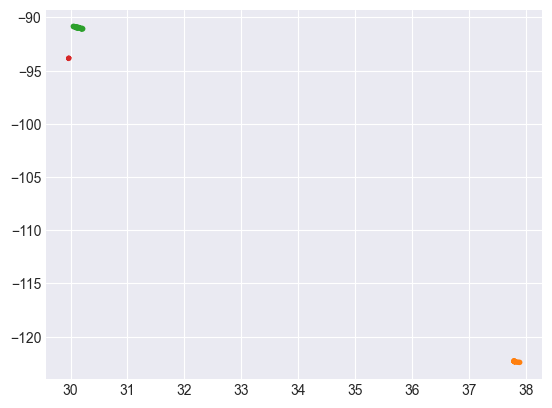

In [14]:
anim = animate(list_of_boats)
HTML(anim.to_html5_video())


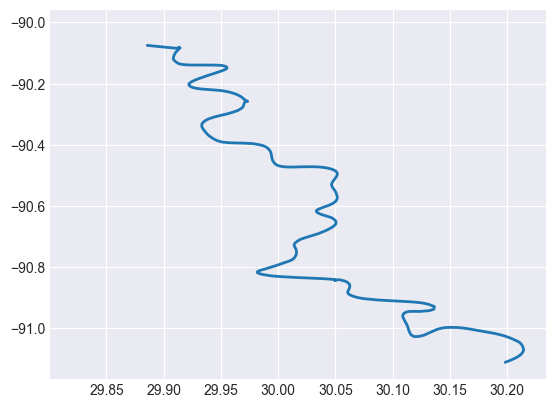

In [15]:
fig, ax = plt.subplots()
line, = ax.plot(x2, y2, lw=2)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    line.set_data(x2[:i],y2[:i])
    return line,

anim = FuncAnimation(fig, animate,frames=1000, interval=100, init_func=init, blit=True)


HTML(anim.to_html5_video())

## Training Model

In [16]:
# Drop rows with missing vessel type (label)
ais_df = ais_df.dropna(subset=['VesselType'])

# Select numeric features and label
features = ['SOG', 'COG', 'Heading', 'Length', 'Width', 'Draft']
label = 'VesselType'

# Drop NaNs in selected columns
train_df = ais_df[features + [label]].dropna()

# Prepare X and y
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

X = train_df[features]
y = train_df[label]

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
import time
from sklearn.ensemble import RandomForestClassifier

since = time.time()
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
elasped_time = time.time() - since
print(f"The training time is {elasped_time//60:.0f}m {elasped_time%60:.0f}s")

The training time is 2m 6s


## Predicting and Metrics

In [18]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    balanced_accuracy_score
)
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred, average='macro'):.4f}")
print(f"F1 Score (macro): {f1_score(y_test, y_pred, average='macro'):.4f}")


Accuracy: 0.9931
Balanced Accuracy: 0.9733
Precision (macro): 0.9759
Recall (macro): 0.9733
F1 Score (macro): 0.9746


In [19]:
from sklearn.metrics import roc_auc_score
# If you have a probability output (e.g. clf.predict_proba) and it's binary or one-vs-rest multiclass
y_proba = clf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.4f}")


ROC AUC Score: 0.9932


In [20]:
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef

print(f"Cohen Kappa Score: {cohen_kappa_score(y_test, y_pred):.4f}")
print(f"Matthews Corrcoef: {matthews_corrcoef(y_test, y_pred):.4f}")


Cohen Kappa Score: 0.9915
Matthews Corrcoef: 0.9915


## Saving the Model

In [21]:
import os
import joblib

save_path = "../model_utils/ais"
os.makedirs(save_path, exist_ok=True)

# Save model, label encoder and scaler
joblib.dump(clf, os.path.join(save_path, "rf_model.joblib"))
joblib.dump(le, os.path.join(save_path, "label_encoder.joblib"))
joblib.dump(scaler, os.path.join(save_path, "scaler.joblib"))

print("Model, encoder, and scaler saved successfully.")


Model, encoder, and scaler saved successfully.


## Explainable AI - SHAP, LIME

In [27]:
# Ensure X_test is a DataFrame before sampling
X_test_df = pd.DataFrame(X_test, columns=X.columns)
X_test_sample = X_test_df.sample(5, random_state=42)

In [51]:
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from IPython.display import HTML, display

def explain_model_lime(model, X_train, X_test, feature_names=None, class_names=None, model_name="model", save_dir="outputs", num_samples=5000):
    """Generate comprehensive LIME explanations and save to outputs/lime/ directory"""
    print("Generating LIME explanations...")
    
    # Create lime directory inside outputs
    lime_dir = os.path.join(save_dir, "lime")
    os.makedirs(lime_dir, exist_ok=True)
    print(f"LIME files will be saved to: {lime_dir}")
    
    try:
        # Convert to numpy arrays and ensure proper data types
        X_train_array = np.array(X_train, dtype=np.float32)
        X_test_array = np.array(X_test, dtype=np.float32)
        
        # Check for any NaN or infinite values
        if np.any(np.isnan(X_train_array)) or np.any(np.isinf(X_train_array)):
            print("Warning: NaN or infinite values found in training data. Cleaning...")
            X_train_array = np.nan_to_num(X_train_array, nan=0.0, posinf=1e6, neginf=-1e6)
        
        if np.any(np.isnan(X_test_array)) or np.any(np.isinf(X_test_array)):
            print("Warning: NaN or infinite values found in test data. Cleaning...")
            X_test_array = np.nan_to_num(X_test_array, nan=0.0, posinf=1e6, neginf=-1e6)
        
        # Ensure feature names are provided
        if feature_names is None:
            feature_names = [f'feature_{i}' for i in range(X_train_array.shape[1])]
        
        # Get sample predictions to determine classes
        sample_pred = model.predict(X_test_array[:5])
        unique_classes = np.unique(sample_pred)
        
        # Ensure class names are provided
        if class_names is None:
            class_names = [f'class_{int(i)}' for i in unique_classes]
        
        print(f"Training data shape: {X_train_array.shape}")
        print(f"Test data shape: {X_test_array.shape}")
        print(f"Feature names: {len(feature_names)}")
        print(f"Class names: {len(class_names)}")
        print(f"Unique classes found: {unique_classes}")
        
        # Check if model has predict_proba method
        has_predict_proba = hasattr(model, 'predict_proba')
        
        if has_predict_proba:
            # Test predict_proba on a small sample
            test_proba = model.predict_proba(X_test_array[:1])
            print(f"Predict_proba output shape: {test_proba.shape}")
            print(f"Sample probabilities: {test_proba[0]}")
            mode = 'classification'
        else:
            print("Warning: Model doesn't have predict_proba method. Using regression mode.")
            mode = 'regression'
        
        # Create LIME explainer with better parameters
        explainer = lime.lime_tabular.LimeTabularExplainer(
            training_data=X_train_array,
            feature_names=feature_names,
            class_names=class_names,
            mode=mode,
            discretize_continuous=True,
            random_state=42,
            sample_around_instance=True,
            discretizer='quartile'  # Use quartile discretizer for better feature binning
        )
        
        # Generate explanations for multiple samples
        explanations = []
        for i in range(min(3, len(X_test_array))):  # Explain first 3 samples
            print(f"Generating explanation for sample {i}...")
            
            try:
                if has_predict_proba:
                    explanation = explainer.explain_instance(
                        data_row=X_test_array[i],
                        predict_fn=model.predict_proba,
                        num_features=min(len(feature_names), 10),  # Limit to top 10 features
                        num_samples=num_samples,
                        top_labels=len(class_names)
                    )
                else:
                    explanation = explainer.explain_instance(
                        data_row=X_test_array[i],
                        predict_fn=model.predict,
                        num_features=min(len(feature_names), 10),
                        num_samples=num_samples
                    )
                
                explanations.append(explanation)
                
                # Save HTML explanation
                html_path = os.path.join(lime_dir, f"lime_{model_name}_explanation_sample{i}.html")
                explanation.save_to_file(html_path)
                print(f"LIME HTML explanation saved to: {html_path}")
                
                # Create and save matplotlib figure with FIXED formatting
                try:
                    if has_predict_proba:
                        # Get the explanation for the predicted class
                        predicted_class = model.predict(X_test_array[i:i+1])[0]
                        exp_list = explanation.as_list(label=predicted_class)
                    else:
                        exp_list = explanation.as_list()
                    
                    # FIXED: Clear any previous plots and set up proper figure
                    plt.clf()
                    plt.close('all')
                    
                    # Calculate dynamic figure size based on number of features
                    num_features = len(exp_list)
                    fig_height = max(8, num_features * 0.6)  # Minimum 8, scale with features
                    fig_width = 14  # Fixed width for better proportions
                    
                    fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=100)
                    
                    features = [item[0] for item in exp_list]
                    values = [item[1] for item in exp_list]
                    
                    # FIXED: Truncate long feature names for better display
                    display_features = []
                    for feature in features:
                        if len(feature) > 25:
                            display_features.append(feature[:22] + "...")
                        else:
                            display_features.append(feature)
                    
                    # Create color map based on positive/negative values
                    colors = ['#2E8B57' if v > 0 else '#DC143C' for v in values]  # Better colors
                    
                    # FIXED: Create horizontal bar plot with proper spacing
                    y_positions = np.arange(len(features))
                    bars = ax.barh(y_positions, values, color=colors, alpha=0.8, height=0.7)
                    
                    # FIXED: Customize plot with better spacing and formatting
                    ax.set_yticks(y_positions)
                    ax.set_yticklabels(display_features, fontsize=10)
                    ax.set_xlabel('LIME Importance Score', fontsize=12, fontweight='bold')
                    ax.set_title(f'LIME Explanation - {model_name} - Sample {i}', 
                                fontsize=14, fontweight='bold', pad=20)
                    
                    # FIXED: Add grid and improve layout
                    ax.grid(axis='x', alpha=0.3, linestyle='--')
                    ax.axvline(x=0, color='black', linewidth=0.8)
                    
                    # FIXED: Add value labels on bars with better positioning
                    for j, (bar, value) in enumerate(zip(bars, values)):
                        if abs(value) > 0.001:  # Only show labels for significant values
                            label_x = value + (0.02 * max(abs(min(values)), abs(max(values))) if value > 0 else -0.02 * max(abs(min(values)), abs(max(values))))
                            ax.text(label_x, j, f'{value:.4f}', 
                                   va='center', ha='left' if value > 0 else 'right',
                                   fontsize=9, fontweight='bold')
                    
                    # FIXED: Set proper margins and layout
                    ax.margins(y=0.02)
                    plt.subplots_adjust(left=0.25, right=0.95, top=0.92, bottom=0.08)
                    
                    # FIXED: Save with better parameters
                    png_path = os.path.join(lime_dir, f"lime_{model_name}_explanation_sample{i}.png")
                    plt.savefig(png_path, dpi=300, bbox_inches='tight', 
                               facecolor='white', edgecolor='none')
                    print(f"LIME PNG saved to: {png_path}")
                    plt.show()
                    plt.close(fig)  # Clean up
                    
                except Exception as e:
                    print(f"Could not create matplotlib figure for sample {i}: {str(e)}")
                    # FIXED: Improved fallback with better error handling
                    try:
                        plt.clf()
                        plt.close('all')
                        fig = explanation.as_pyplot_figure()
                        if fig is not None:
                            fig.suptitle(f'LIME Explanation - {model_name} - Sample {i}', fontsize=14)
                            fig.set_size_inches(12, 8)
                            png_path = os.path.join(lime_dir, f"lime_{model_name}_explanation_sample{i}.png")
                            fig.savefig(png_path, dpi=300, bbox_inches='tight', 
                                       facecolor='white', edgecolor='none')
                            print(f"LIME PNG (fallback) saved to: {png_path}")
                            plt.show()
                            plt.close(fig)
                    except Exception as e2:
                        print(f"Fallback plot also failed: {str(e2)}")
                
                # Print text explanation with better formatting
                print(f"\nLIME Explanation for Sample {i}:")
                print("-" * 60)
                
                if has_predict_proba:
                    predicted_class = model.predict(X_test_array[i:i+1])[0]
                    exp_list = explanation.as_list(label=predicted_class)
                    print(f"Explaining prediction for class: {predicted_class}")
                else:
                    exp_list = explanation.as_list()
                
                for feature, weight in exp_list:
                    print(f"{feature:30s}: {weight:8.4f}")
                print("-" * 60)
                
                # Get prediction info
                try:
                    if has_predict_proba:
                        prediction = model.predict_proba(X_test_array[i:i+1])[0]
                        predicted_class = np.argmax(prediction)
                        print(f"Predicted class: {class_names[predicted_class]} (confidence: {prediction[predicted_class]:.4f})")
                        print(f"All class probabilities: {dict(zip(class_names, prediction))}")
                    else:
                        prediction = model.predict(X_test_array[i:i+1])[0]
                        print(f"Predicted value: {prediction:.4f}")
                except Exception as e:
                    print(f"Could not get prediction info: {str(e)}")
                
                print("\n" + "="*60 + "\n")
                
            except Exception as e:
                print(f"Error generating explanation for sample {i}: {str(e)}")
                continue
        
        # Create summary visualization
        if explanations:
            print("\nCreating LIME summary visualization...")
            create_lime_summary(explanations, feature_names, class_names, lime_dir, model_name)
        
        return explanations
        
    except Exception as e:
        print(f"Error in LIME explanation: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

def create_lime_summary(explanations, feature_names, class_names, lime_dir, model_name):
    """Create summary visualizations for LIME explanations"""
    if not explanations:
        return
    
    try:
        # Collect feature importance across all explanations
        feature_importance_summary = {}
        
        for i, explanation in enumerate(explanations):
            try:
                # Get explanation for the first/main class
                exp_list = explanation.as_list()
                if hasattr(explanation, 'available_labels') and explanation.available_labels():
                    # For classification, get explanation for predicted class
                    exp_list = explanation.as_list(label=explanation.available_labels()[0])
                
                for feature, weight in exp_list:
                    if feature not in feature_importance_summary:
                        feature_importance_summary[feature] = []
                    feature_importance_summary[feature].append(weight)
            except Exception as e:
                print(f"Error processing explanation {i}: {str(e)}")
                continue
        
        if not feature_importance_summary:
            print("No feature importance data collected for summary")
            return
        
        # Calculate mean and std for each feature
        feature_stats = {}
        for feature, weights in feature_importance_summary.items():
            feature_stats[feature] = {
                'mean': np.mean(weights),
                'std': np.std(weights),
                'count': len(weights)
            }
        
        # Create summary plot
        features = list(feature_stats.keys())
        means = [feature_stats[f]['mean'] for f in features]
        stds = [feature_stats[f]['std'] for f in features]
        
        # Sort by absolute mean importance
        sorted_indices = np.argsort([abs(m) for m in means])[::-1]
        features = [features[i] for i in sorted_indices]
        means = [means[i] for i in sorted_indices]
        stds = [stds[i] for i in sorted_indices]
        
        # FIXED: Create improved summary plot with better layout
        plt.clf()
        plt.close('all')
        
        # Dynamic sizing based on number of features
        num_features = len(features)
        fig_height = max(10, num_features * 0.8)
        fig_width = 16
        
        fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=100)
        
        # Truncate long feature names
        display_features = []
        for feature in features:
            if len(feature) > 30:
                display_features.append(feature[:27] + "...")
            else:
                display_features.append(feature)
        
        y_pos = np.arange(len(features))
        
        # Create horizontal bars with error bars
        bars = ax.barh(y_pos, means, xerr=stds, capsize=5, alpha=0.8, 
                      color=['#2E8B57' if m > 0 else '#DC143C' for m in means],
                      height=0.7)
        
        # Customize plot
        ax.set_yticks(y_pos)
        ax.set_yticklabels(display_features, fontsize=10)
        ax.set_xlabel('Mean LIME Importance Score', fontsize=12, fontweight='bold')
        ax.set_title(f'LIME Feature Importance Summary - {model_name}', 
                    fontsize=14, fontweight='bold', pad=20)
        ax.grid(axis='x', alpha=0.3, linestyle='--')
        ax.axvline(x=0, color='black', linewidth=0.8)
        
        # Add value labels
        for i, (bar, mean_val, std_val) in enumerate(zip(bars, means, stds)):
            if abs(mean_val) > 0.001:
                label_x = mean_val + (std_val * 1.1 if mean_val > 0 else -std_val * 1.1)
                ax.text(label_x, i, f'{mean_val:.4f}±{std_val:.4f}', 
                       va='center', ha='left' if mean_val > 0 else 'right', 
                       fontsize=9, fontweight='bold')
        
        # FIXED: Better layout and margins
        ax.margins(y=0.02)
        plt.subplots_adjust(left=0.25, right=0.95, top=0.92, bottom=0.08)
        
        summary_path = os.path.join(lime_dir, f"lime_{model_name}_feature_importance_summary.png")
        plt.savefig(summary_path, dpi=300, bbox_inches='tight', 
                   facecolor='white', edgecolor='none')
        print(f"LIME summary plot saved to: {summary_path}")
        plt.show()
        plt.close(fig)
        
        # Save summary statistics to CSV
        summary_df = pd.DataFrame([
            {
                'feature': feature,
                'mean_importance': stats['mean'],
                'std_importance': stats['std'],
                'abs_mean_importance': abs(stats['mean']),
                'sample_count': stats['count']
            }
            for feature, stats in feature_stats.items()
        ]).sort_values('abs_mean_importance', ascending=False)
        
        csv_path = os.path.join(lime_dir, f"lime_{model_name}_feature_importance_summary.csv")
        summary_df.to_csv(csv_path, index=False)
        print(f"LIME summary statistics saved to: {csv_path}")
        
        # Print summary statistics
        print("\nLIME Feature Importance Summary:")
        print("-" * 70)
        print(f"{'Feature':<30} {'Mean':<10} {'Std':<10} {'Count':<10}")
        print("-" * 70)
        for _, row in summary_df.head(10).iterrows():
            print(f"{row['feature']:<30} {row['mean_importance']:<10.4f} {row['std_importance']:<10.4f} {row['sample_count']:<10}")
        
    except Exception as e:
        print(f"Error creating LIME summary: {str(e)}")
        import traceback
        traceback.print_exc()

=== COMPLETE EXPLAINABILITY ANALYSIS ===
Model: RandomForestClassifier
Training data shape: (1949847, 6)
Test sample shape: (5, 6)
All feature names: ['SOG', 'COG', 'Heading', 'Length', 'Width', 'Draft']
Number of classes: 41
Sample of classes: [ 0. 10. 16. 19. 20. 25. 30. 31. 32. 33.]...
Test predictions: [12  7  6 23  7]
Test probabilities shape: (5, 41)

SHAP ANALYSIS
Generating SHAP explanations...


d:\Projects\Hackathon\Agentic Hackathon\illegal_fish\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
d:\Projects\Hackathon\Agentic Hackathon\illegal_fish\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


SHAP files will be saved to: outputs\shap


d:\Projects\Hackathon\Agentic Hackathon\illegal_fish\Lib\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


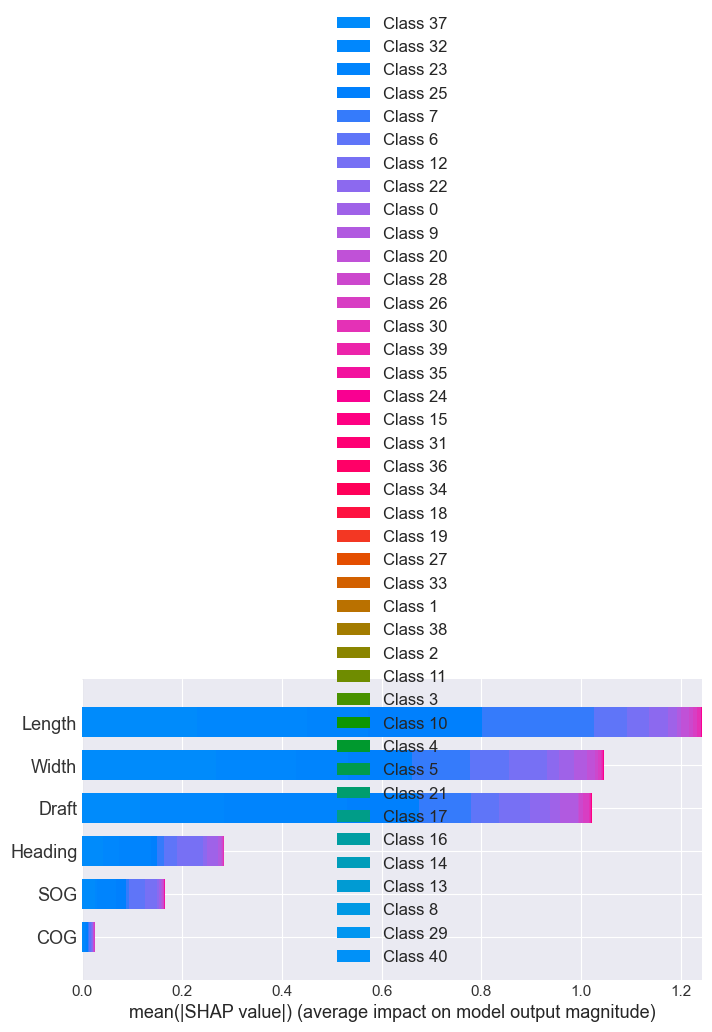

d:\Projects\Hackathon\Agentic Hackathon\illegal_fish\Lib\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


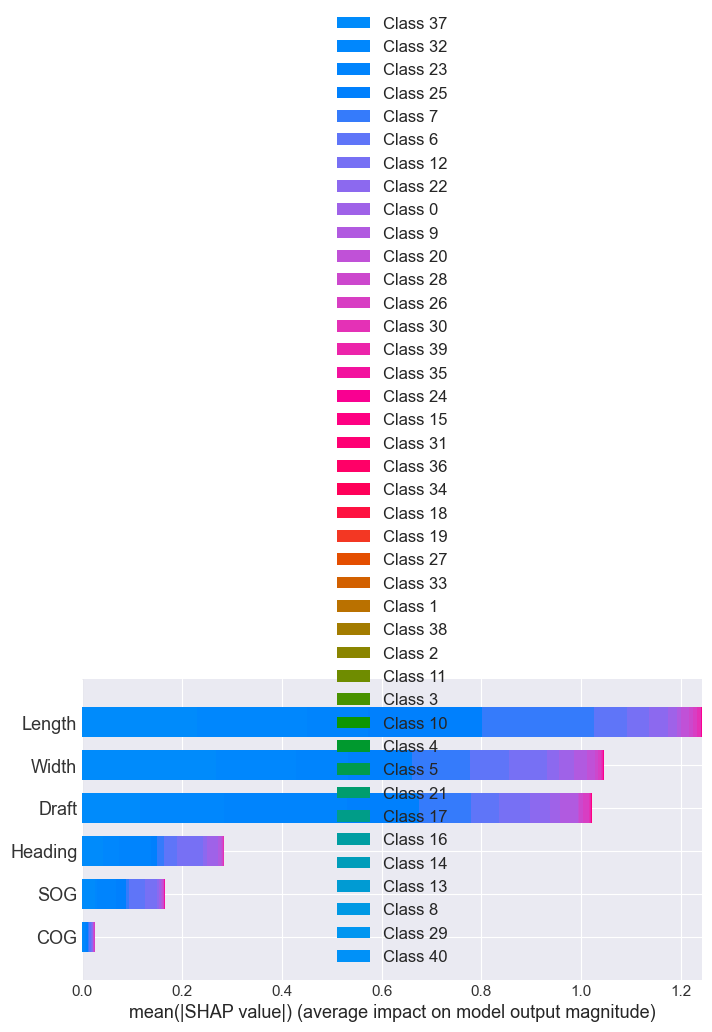

Multi-class model detected with 41 classes


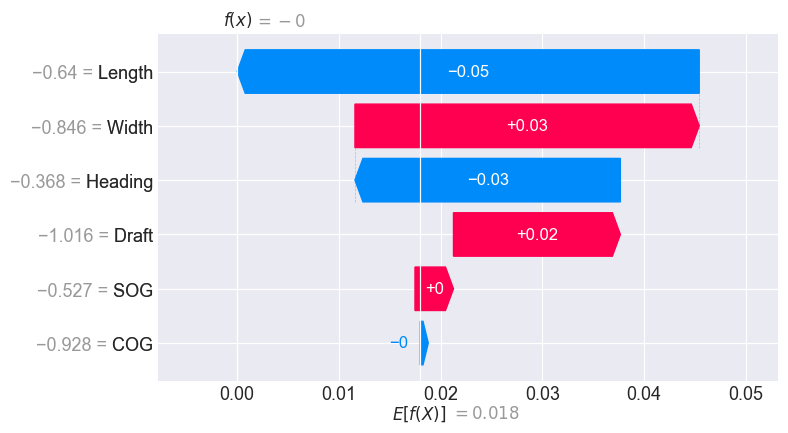

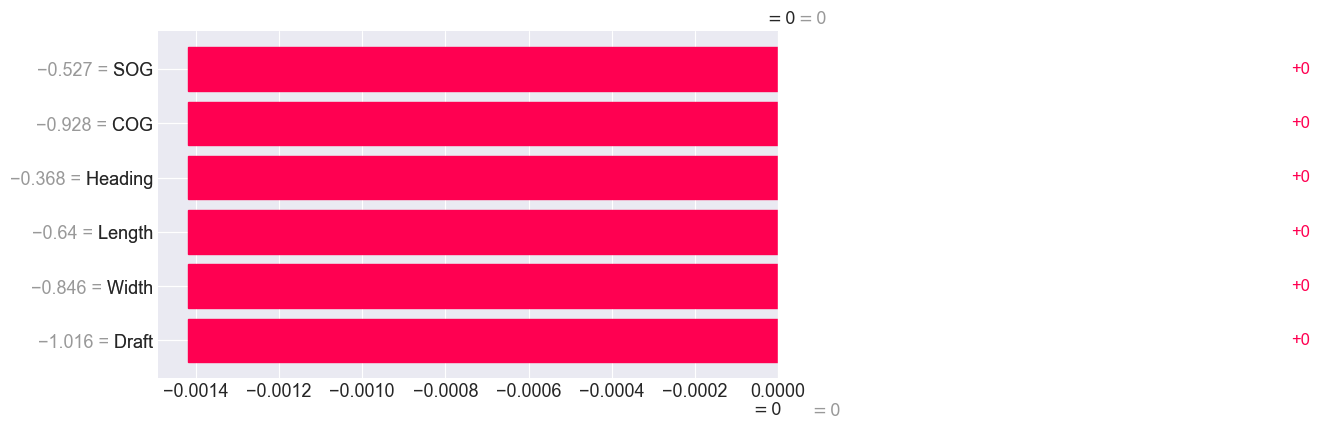

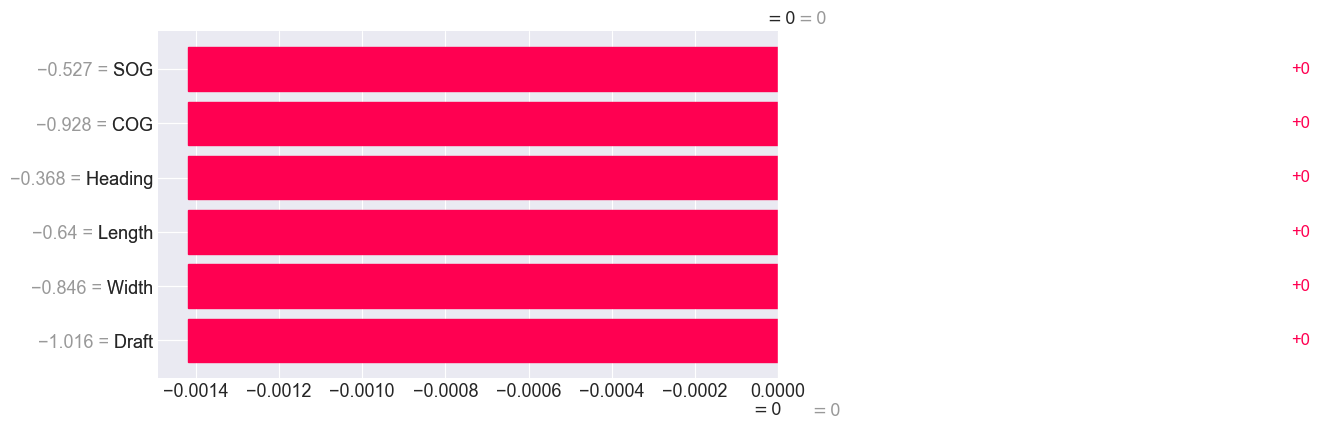

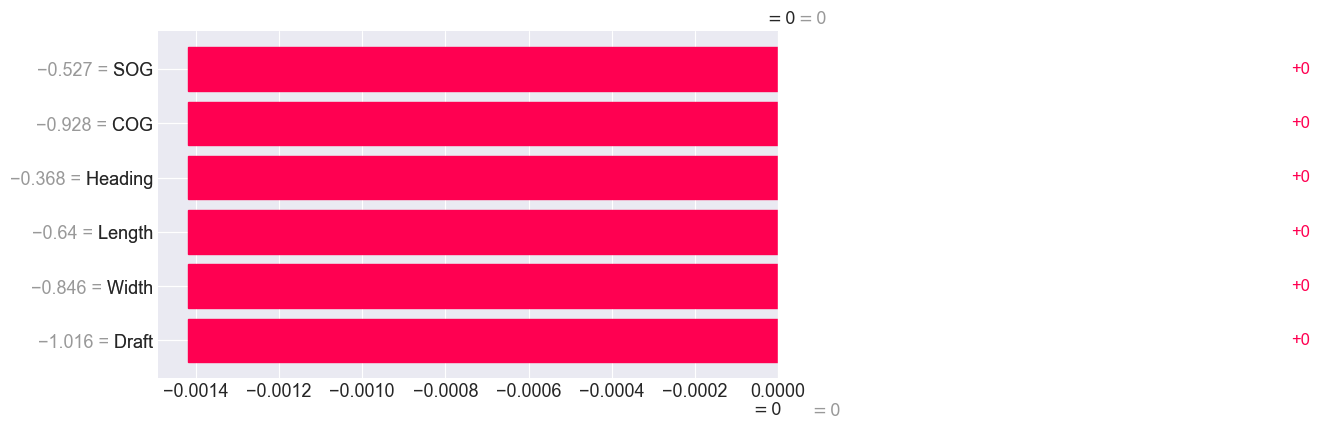

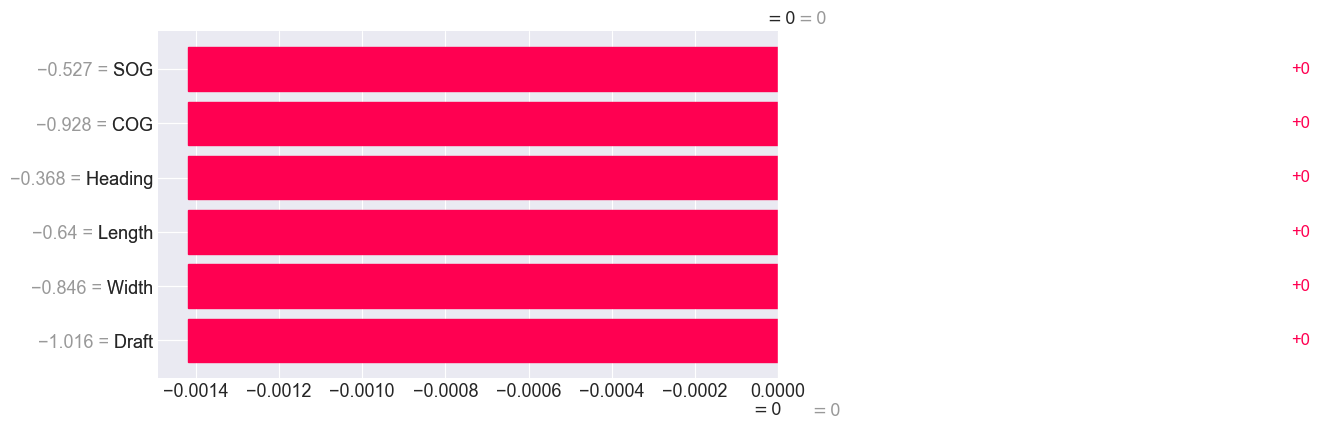

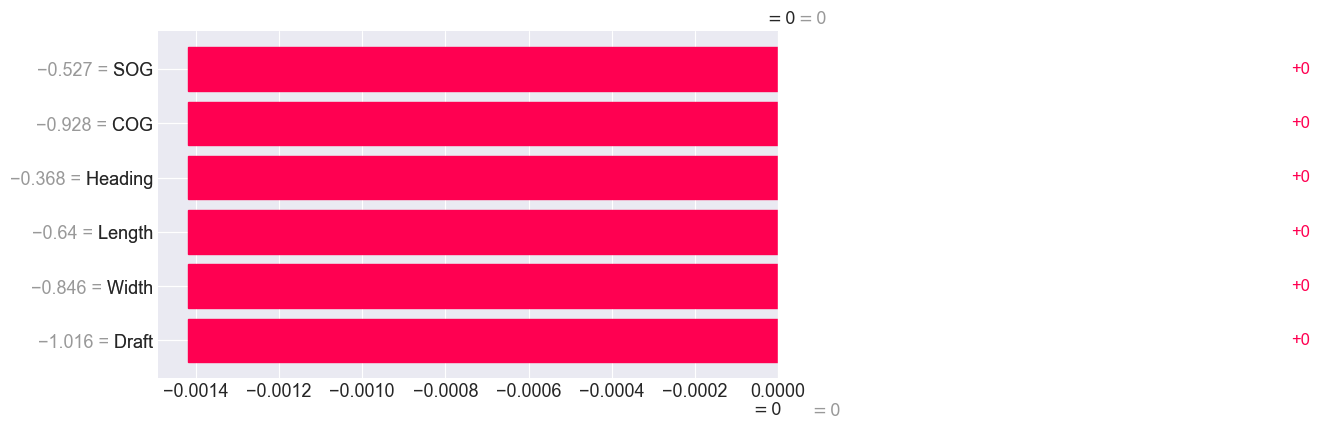

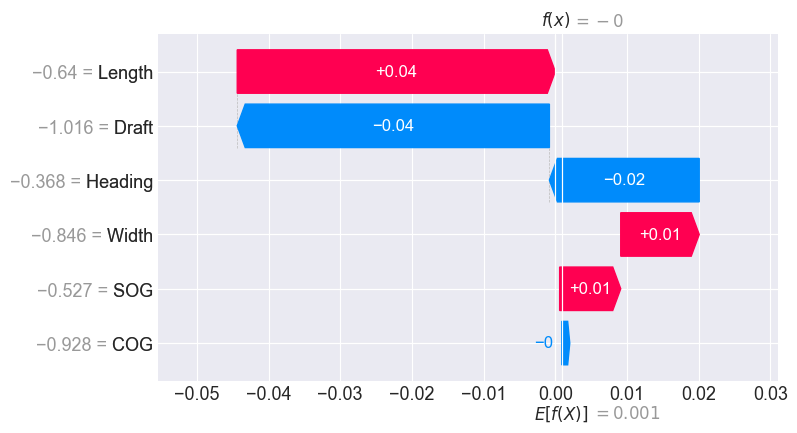

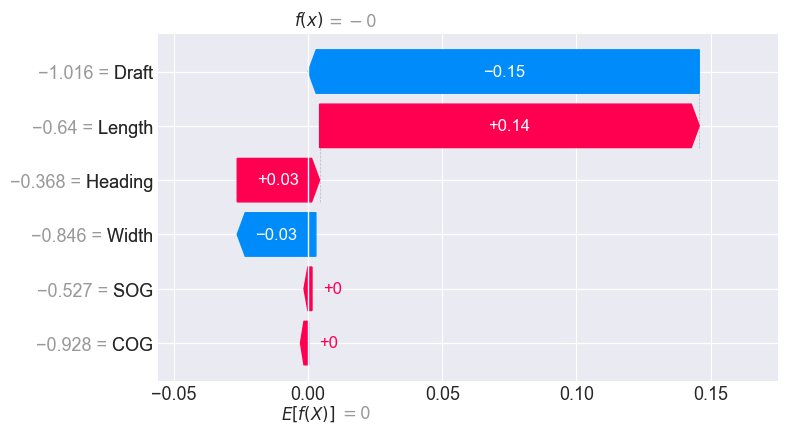

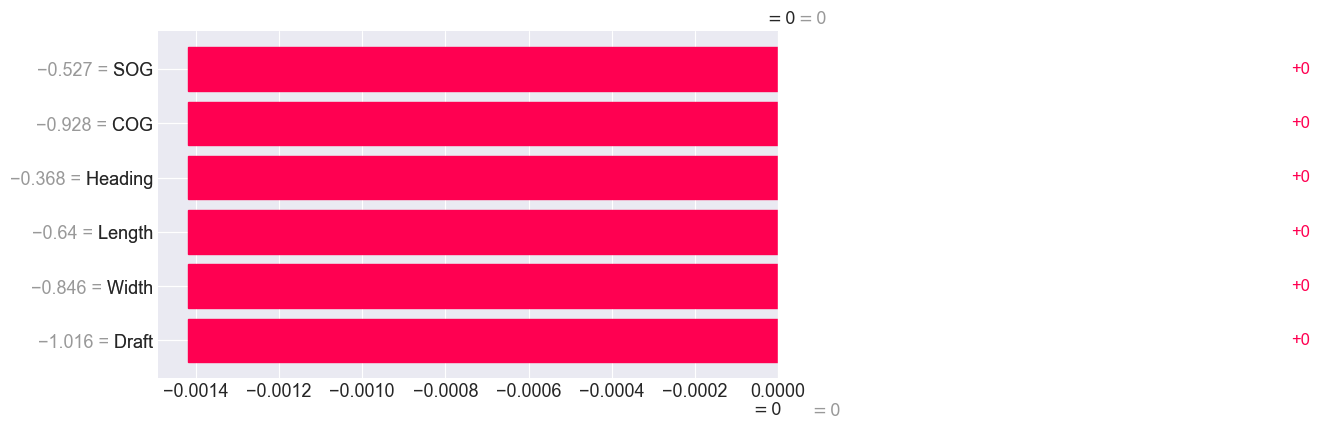

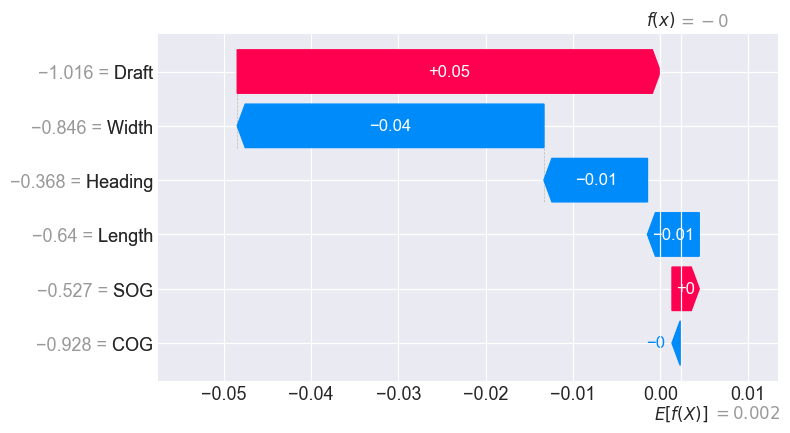

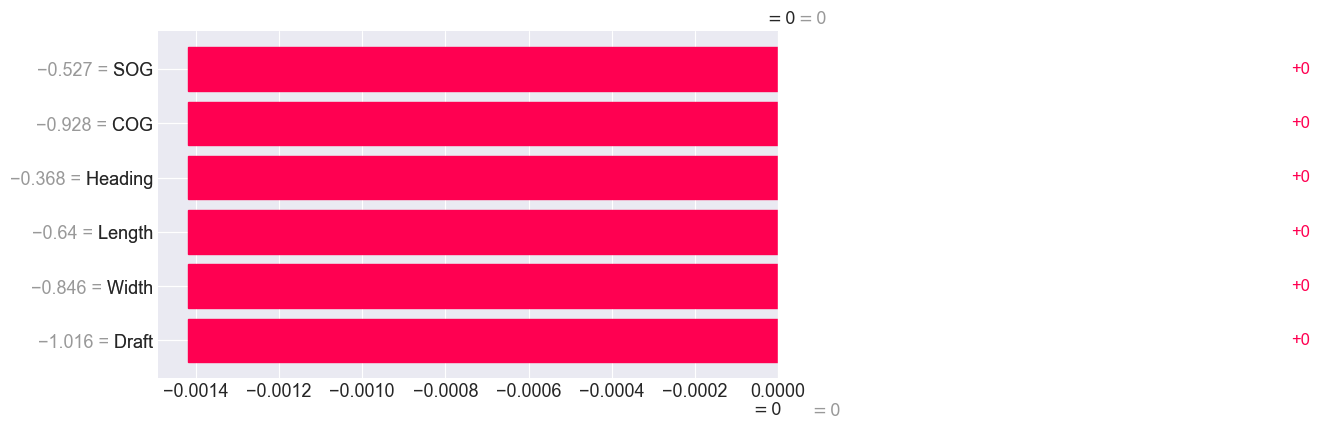

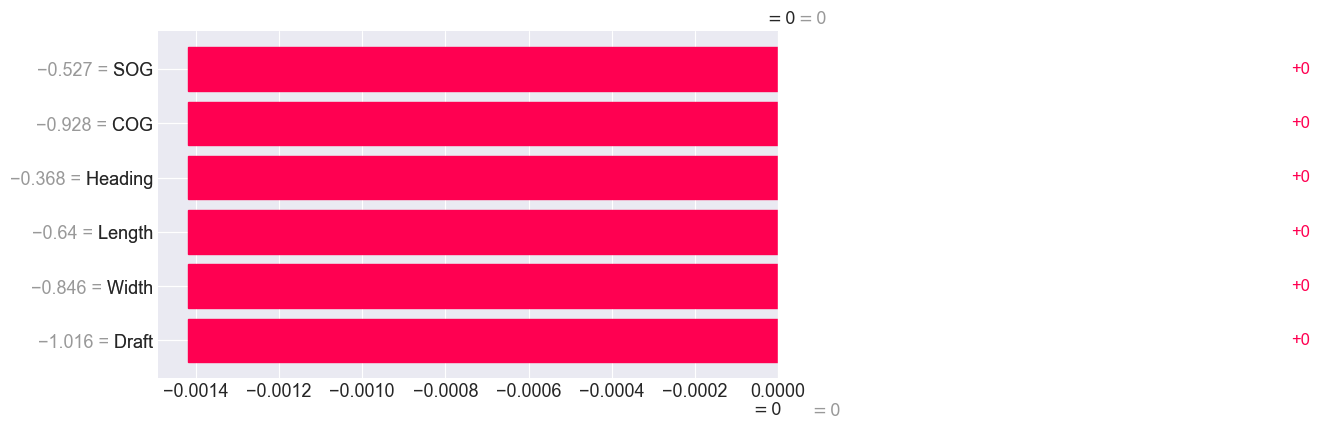

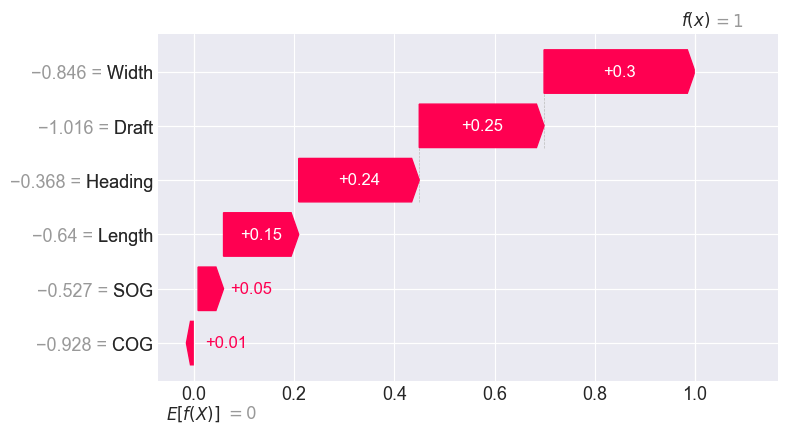

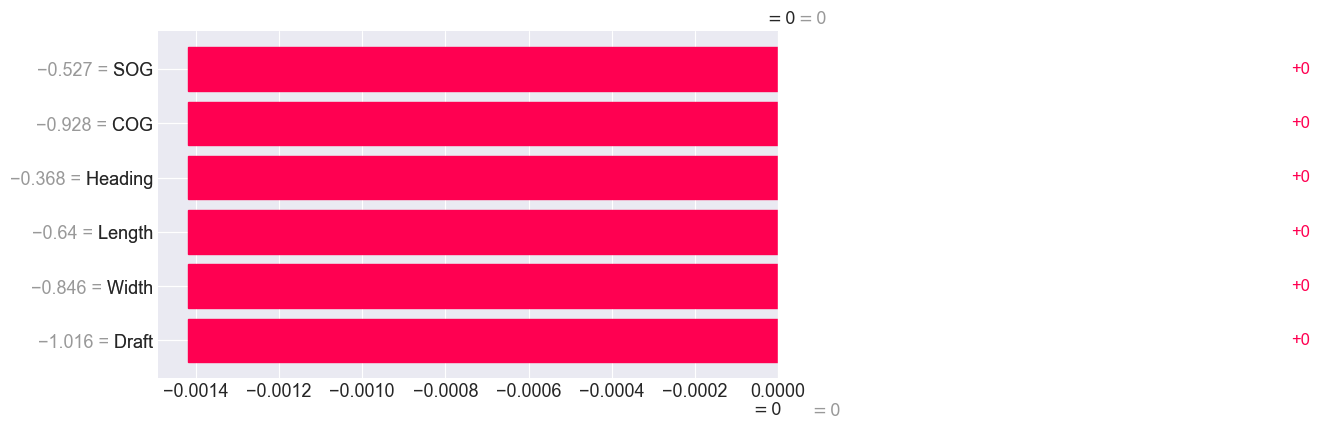

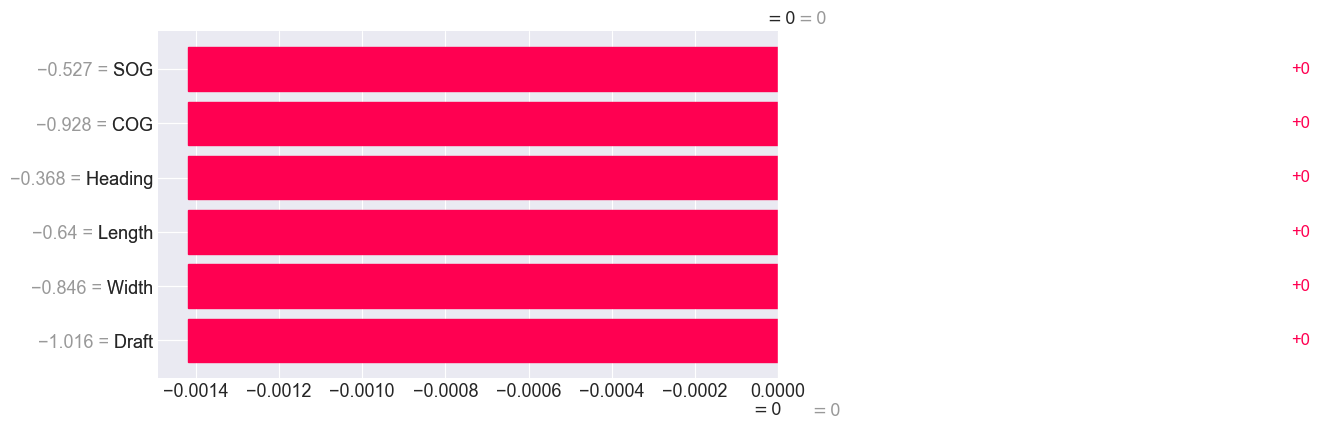

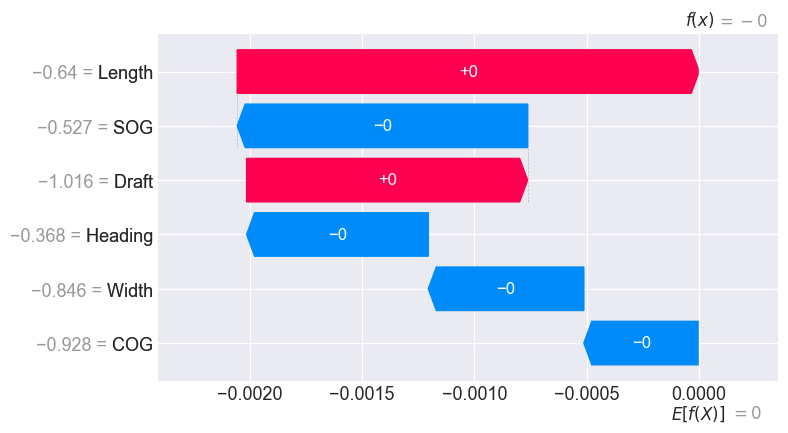

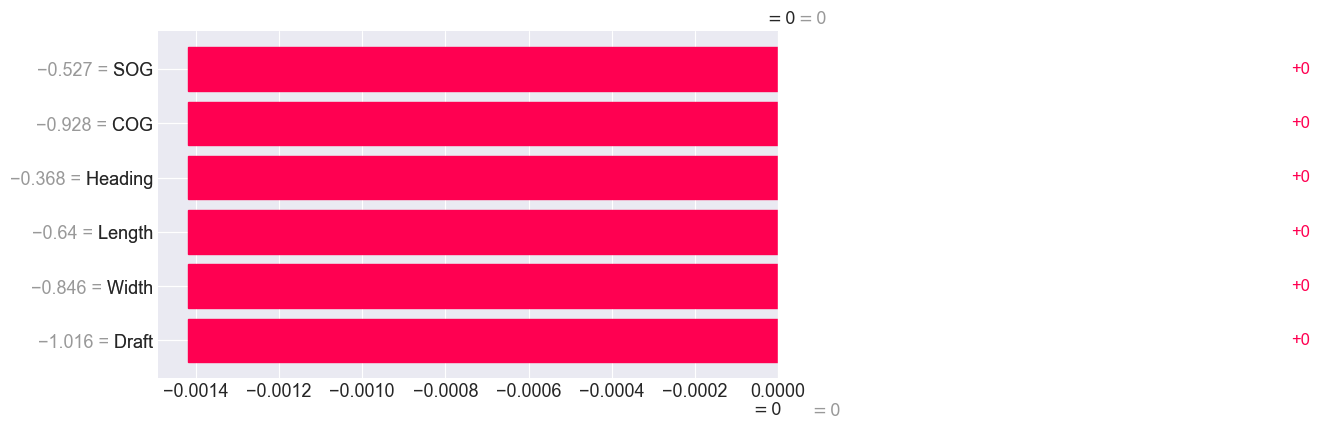

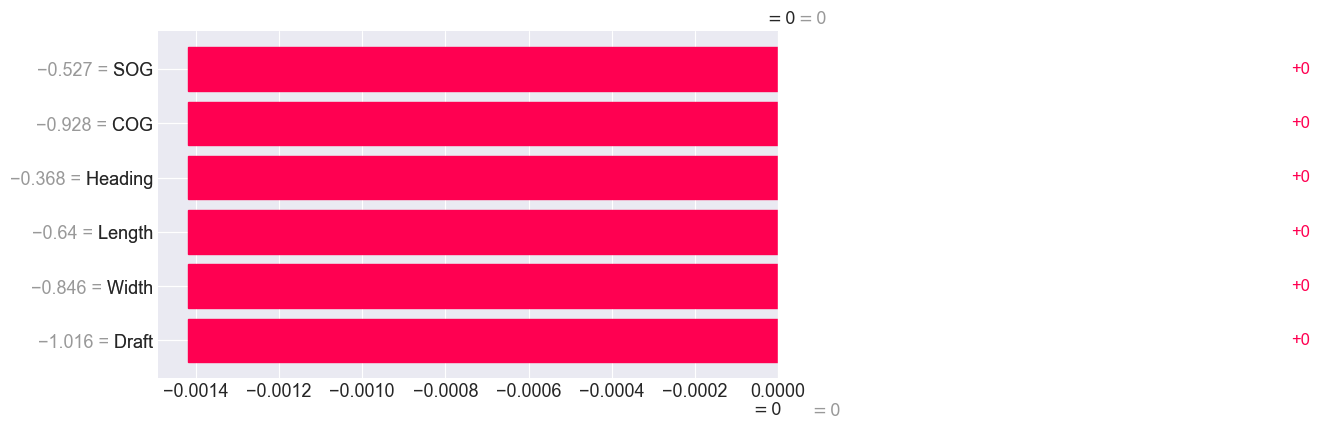

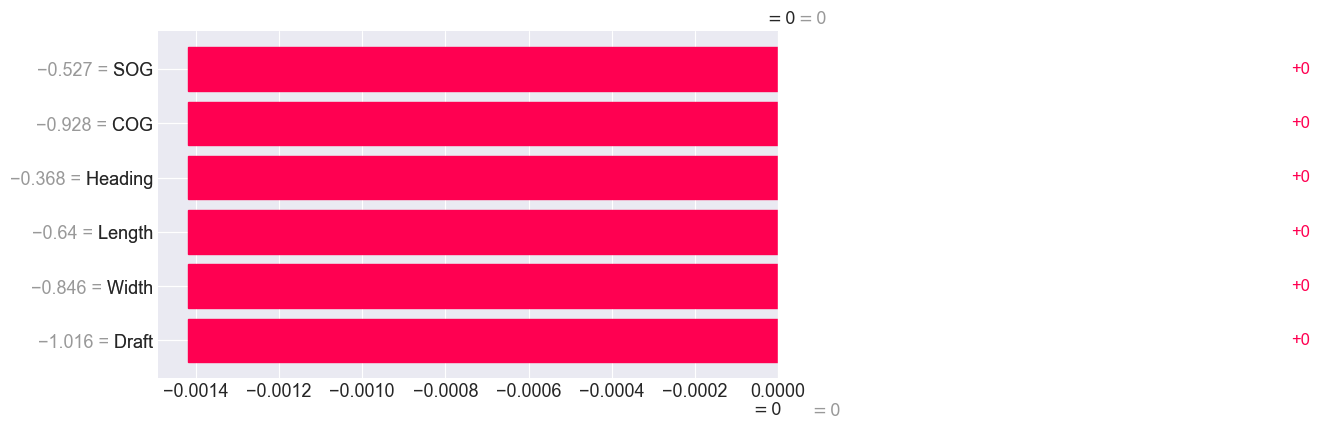

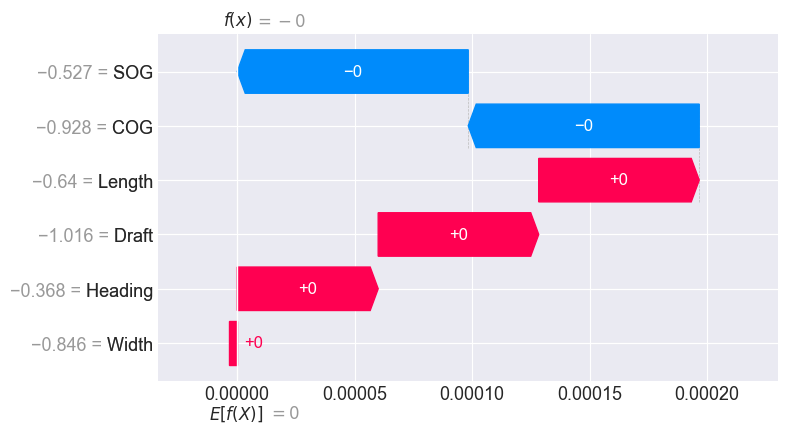

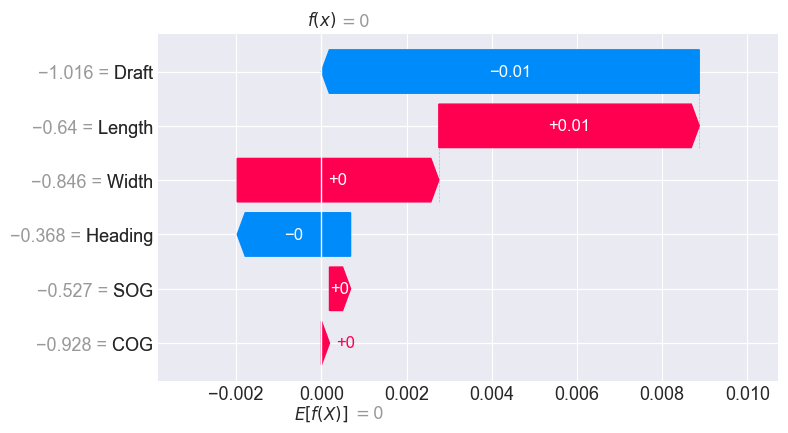

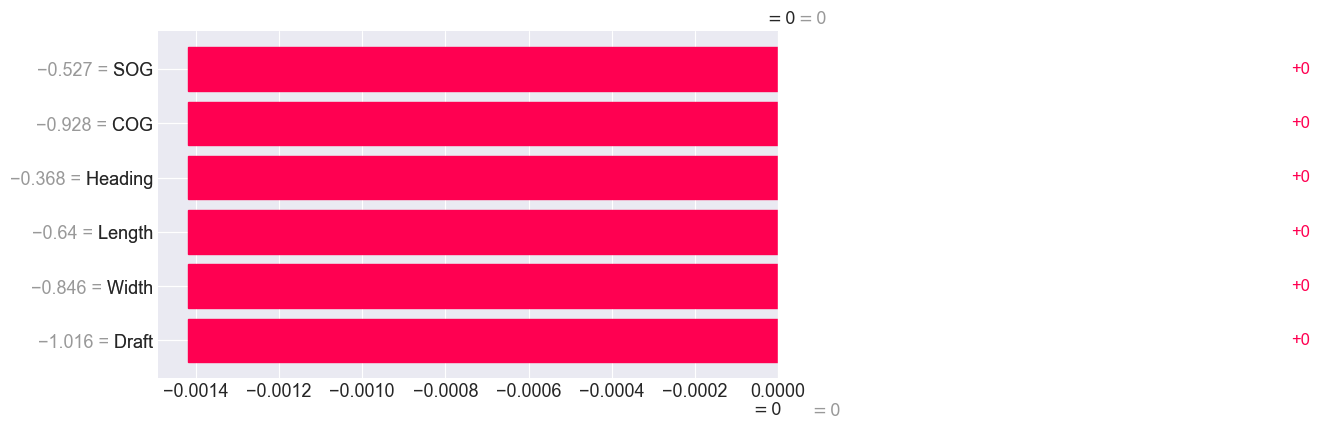

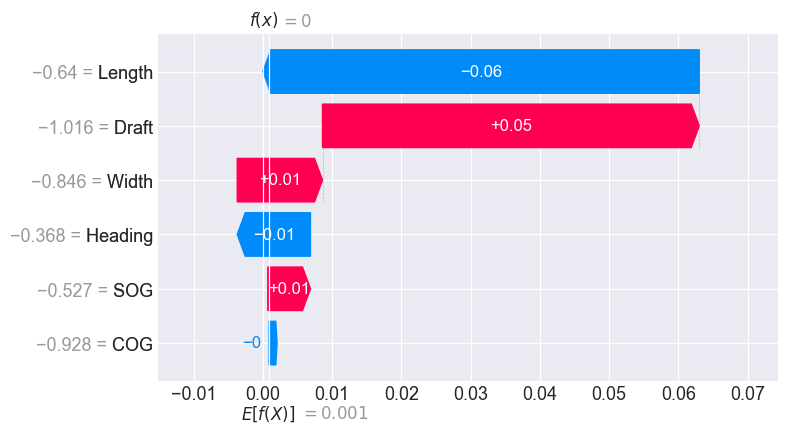

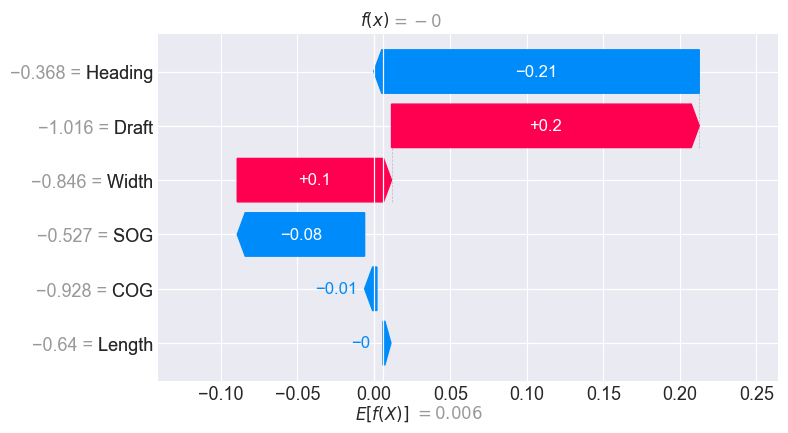

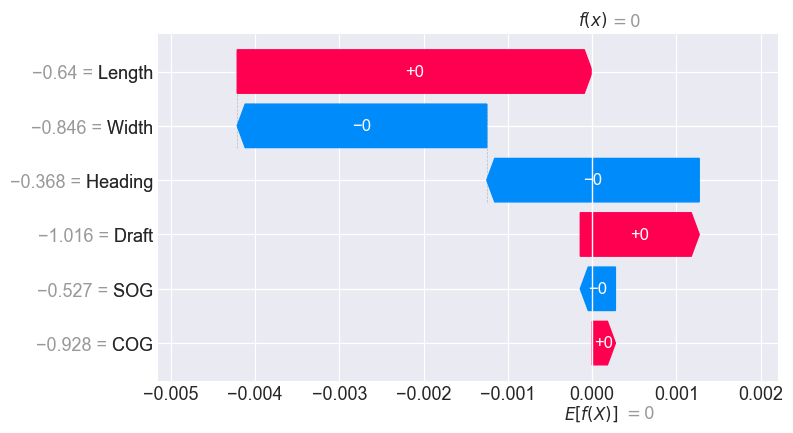

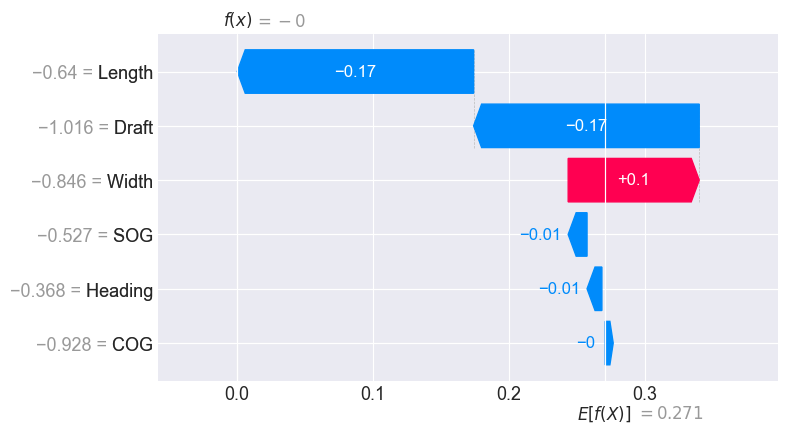

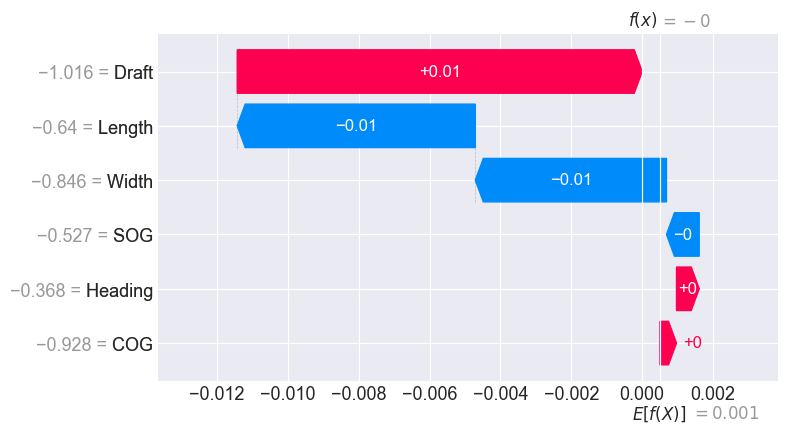

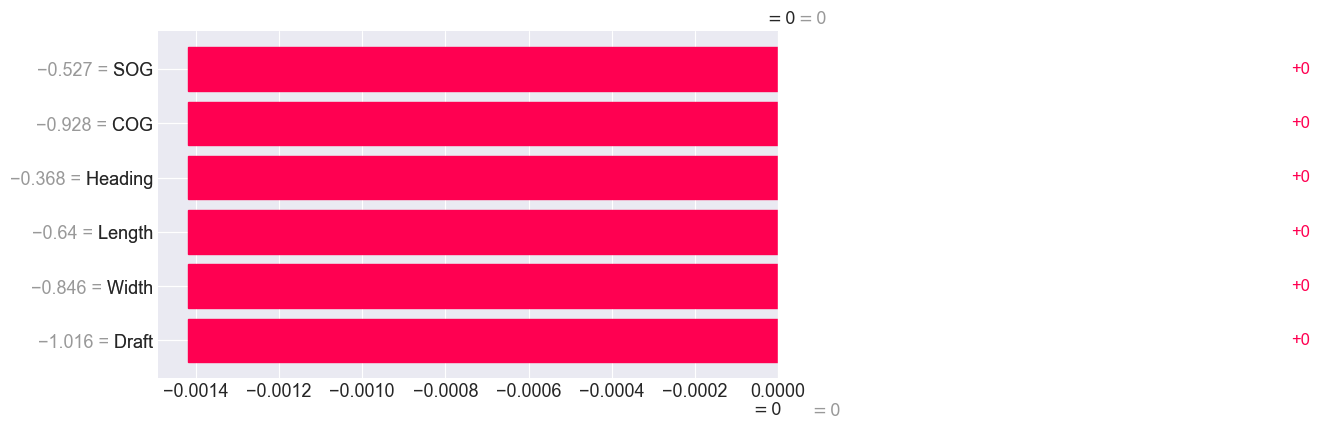

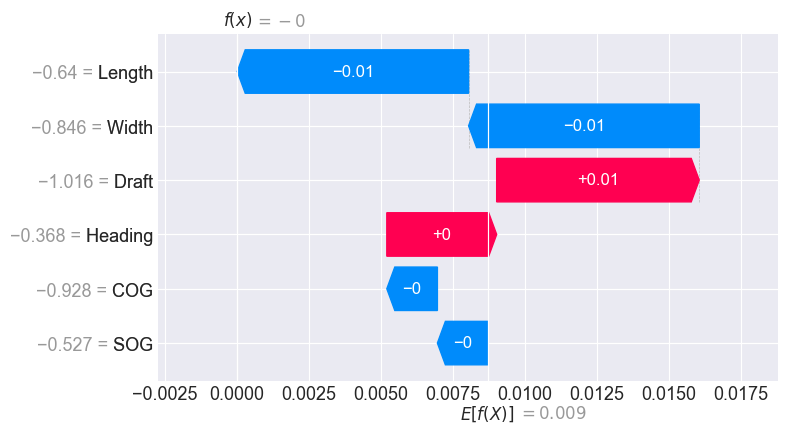

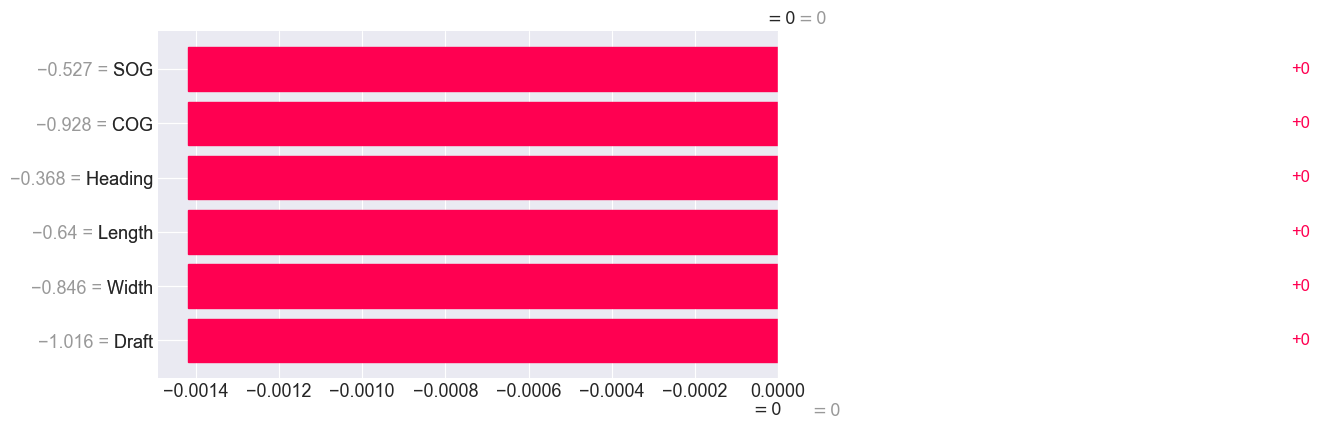

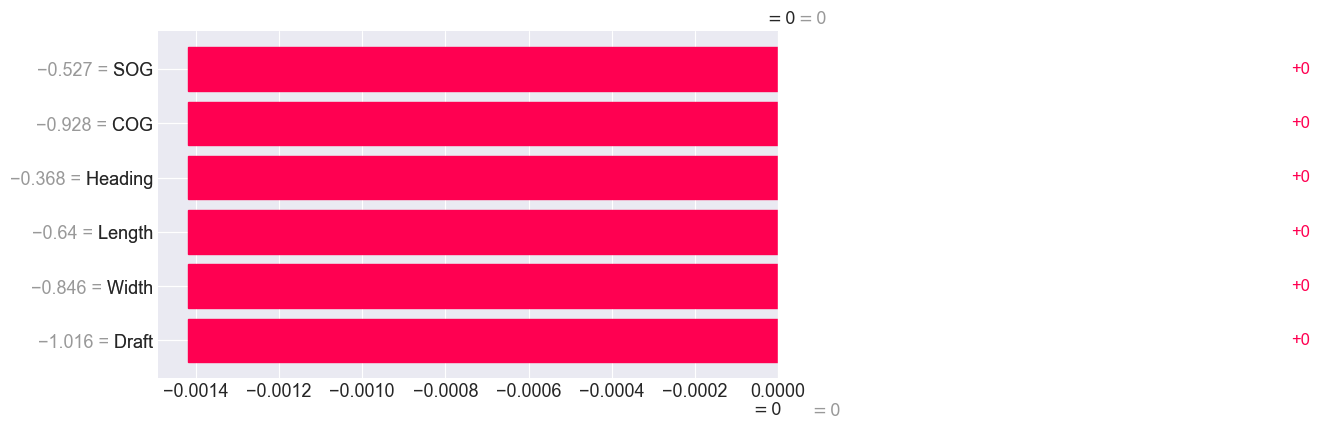

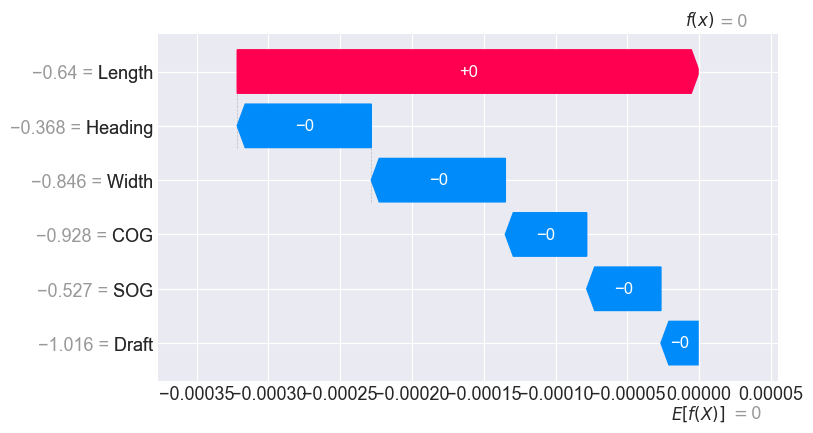

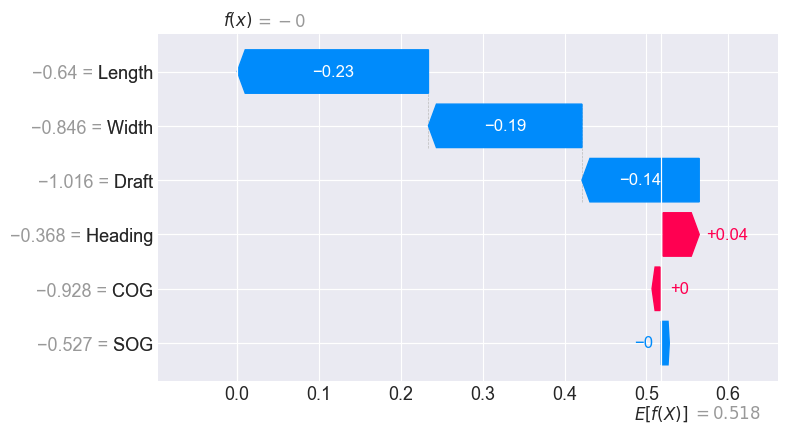

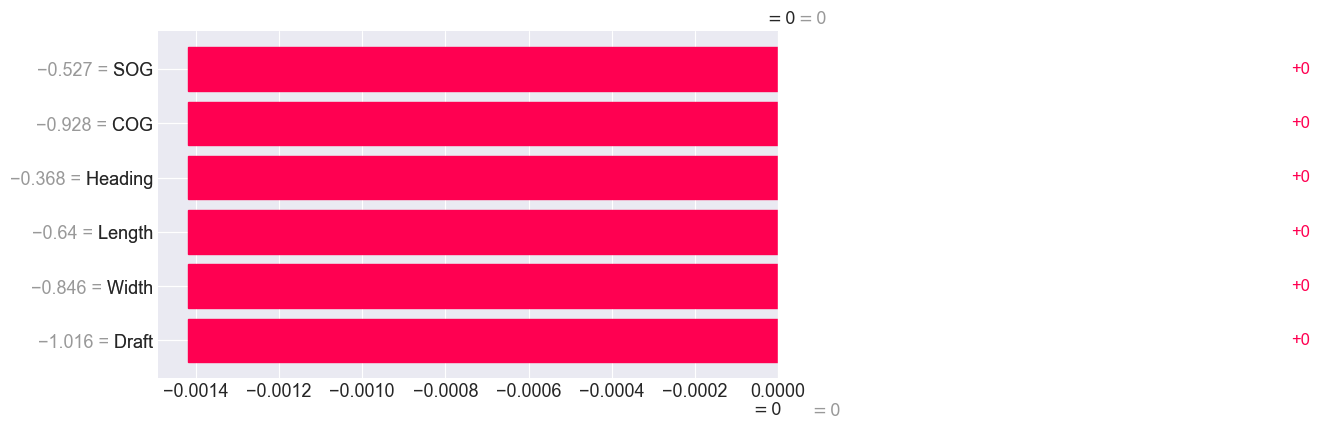

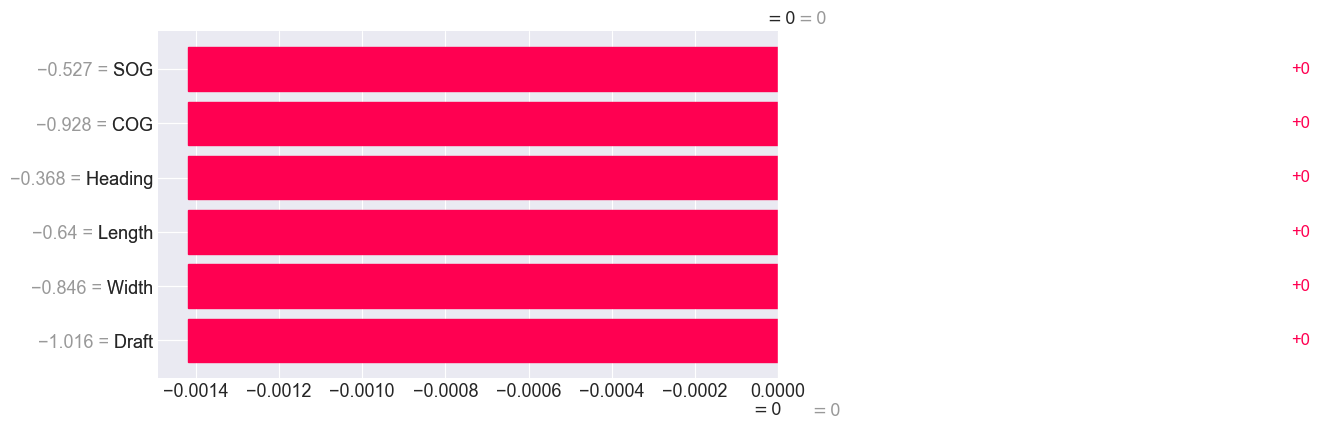

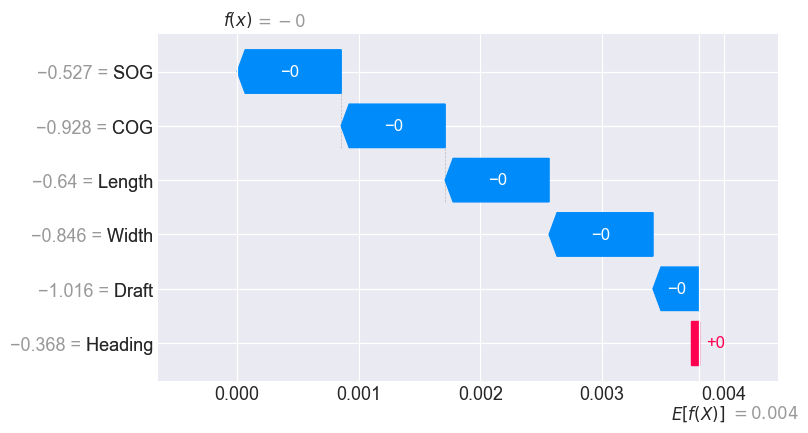

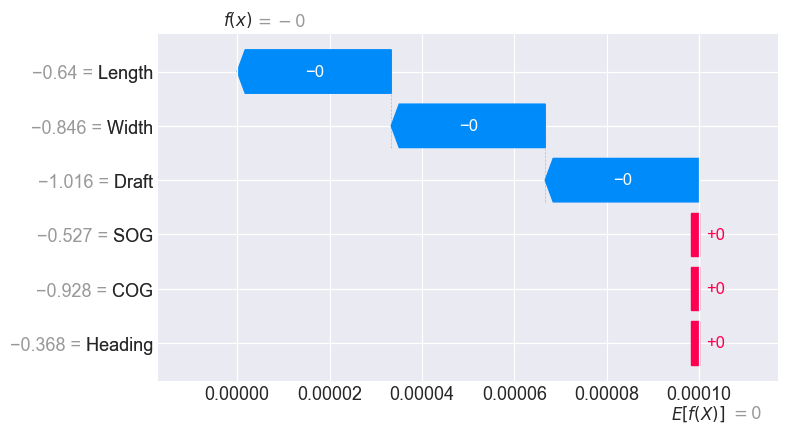

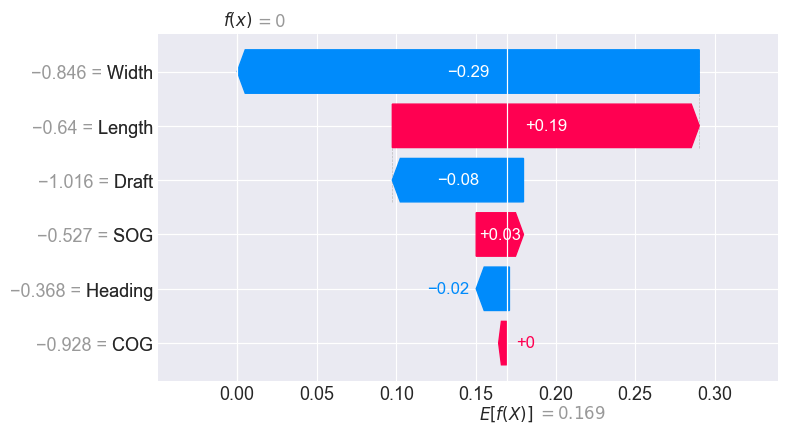

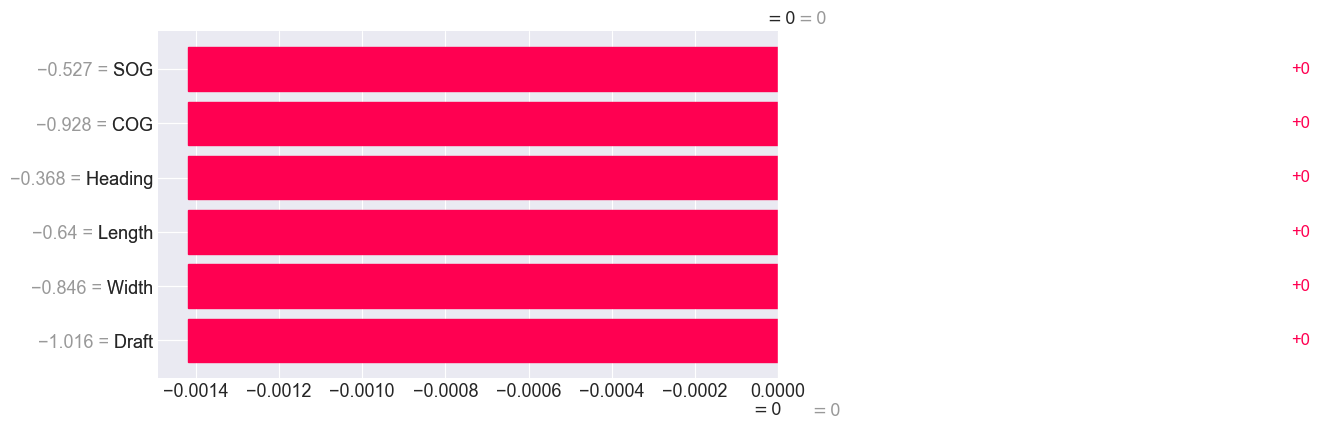

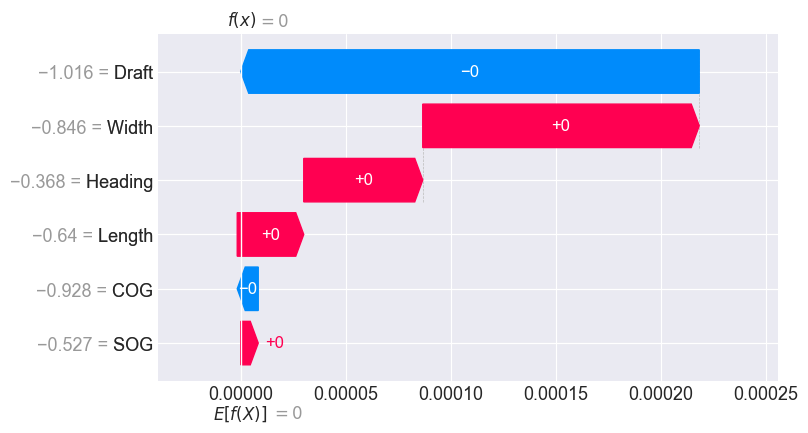

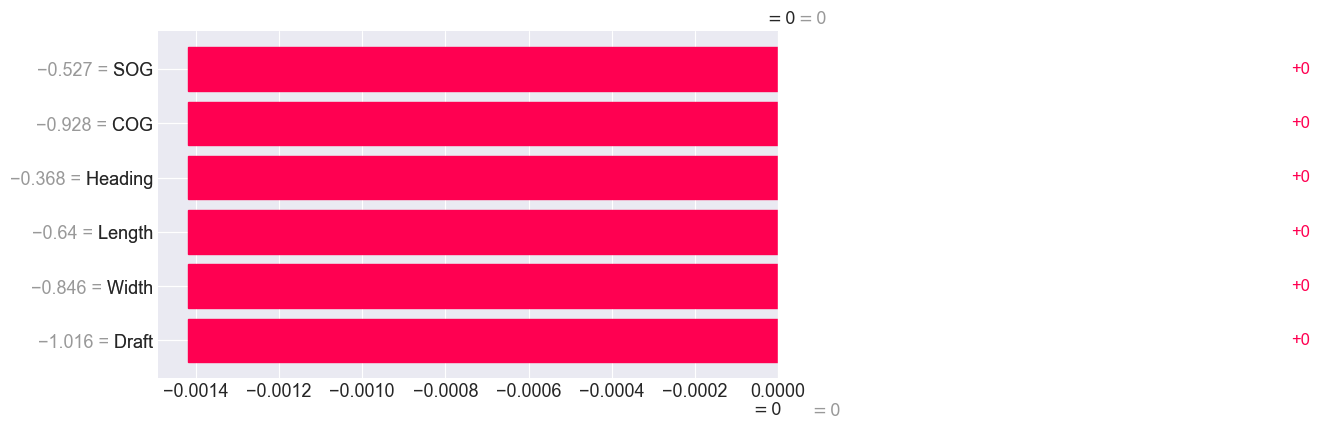

d:\Projects\Hackathon\Agentic Hackathon\illegal_fish\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


<Figure size 1200x400 with 0 Axes>

✅ SHAP analysis completed successfully!
SHAP values shape: (5, 6, 41)
Multi-class model detected with 41 classes

Top 5 features for class 0.0:
  1. Width: 0.0303
  2. Heading: 0.0223
  3. Draft: 0.0192
  4. Length: 0.0180
  5. SOG: 0.0036

Top 5 features for class 10.0:
  1. Draft: 0.0000
  2. Width: 0.0000
  3. Length: 0.0000
  4. Heading: 0.0000
  5. COG: 0.0000

Top 5 features for class 16.0:
  1. Draft: 0.0000
  2. Width: 0.0000
  3. Length: 0.0000
  4. Heading: 0.0000
  5. COG: 0.0000

LIME ANALYSIS
Generating LIME explanations...
LIME files will be saved to: outputs\lime
Training data shape: (500, 6)
Test data shape: (5, 6)
Feature names: 6
Class names: 41
Unique classes found: [ 6  7 12 23]
Predict_proba output shape: (1, 41)
Sample probabilities: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Generating explanation for sample 0...
LIME HTML explanation saved to: outputs\lime\lime_rf_explanation_samp

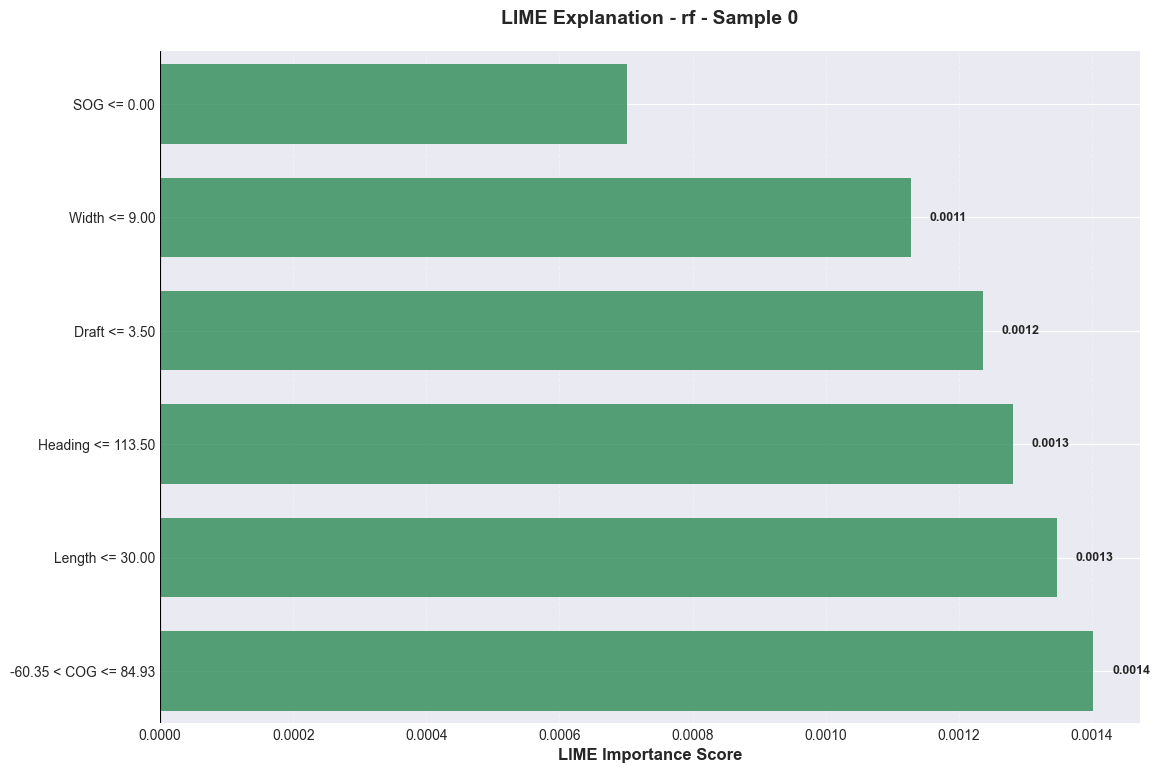


LIME Explanation for Sample 0:
------------------------------------------------------------
Explaining prediction for class: 12
-60.35 < COG <= 84.93         :   0.0014
Length <= 30.00               :   0.0013
Heading <= 113.50             :   0.0013
Draft <= 3.50                 :   0.0012
Width <= 9.00                 :   0.0011
SOG <= 0.00                   :   0.0007
------------------------------------------------------------
Predicted class: 37.0 (confidence: 1.0000)
All class probabilities: {0.0: 0.0, 10.0: 0.0, 16.0: 0.0, 19.0: 0.0, 20.0: 0.0, 25.0: 0.0, 30.0: 0.0, 31.0: 0.0, 32.0: 0.0, 33.0: 0.0, 34.0: 0.0, 36.0: 0.0, 37.0: 1.0, 38.0: 0.0, 39.0: 0.0, 40.0: 0.0, 47.0: 0.0, 49.0: 0.0, 50.0: 0.0, 51.0: 0.0, 52.0: 0.0, 53.0: 0.0, 57.0: 0.0, 60.0: 0.0, 69.0: 0.0, 70.0: 0.0, 71.0: 0.0, 73.0: 0.0, 74.0: 0.0, 76.0: 0.0, 77.0: 0.0, 79.0: 0.0, 80.0: 0.0, 81.0: 0.0, 82.0: 0.0, 84.0: 0.0, 89.0: 0.0, 90.0: 0.0, 91.0: 0.0, 99.0: 0.0, 170.0: 0.0}


Generating explanation for sample 1...
LIM

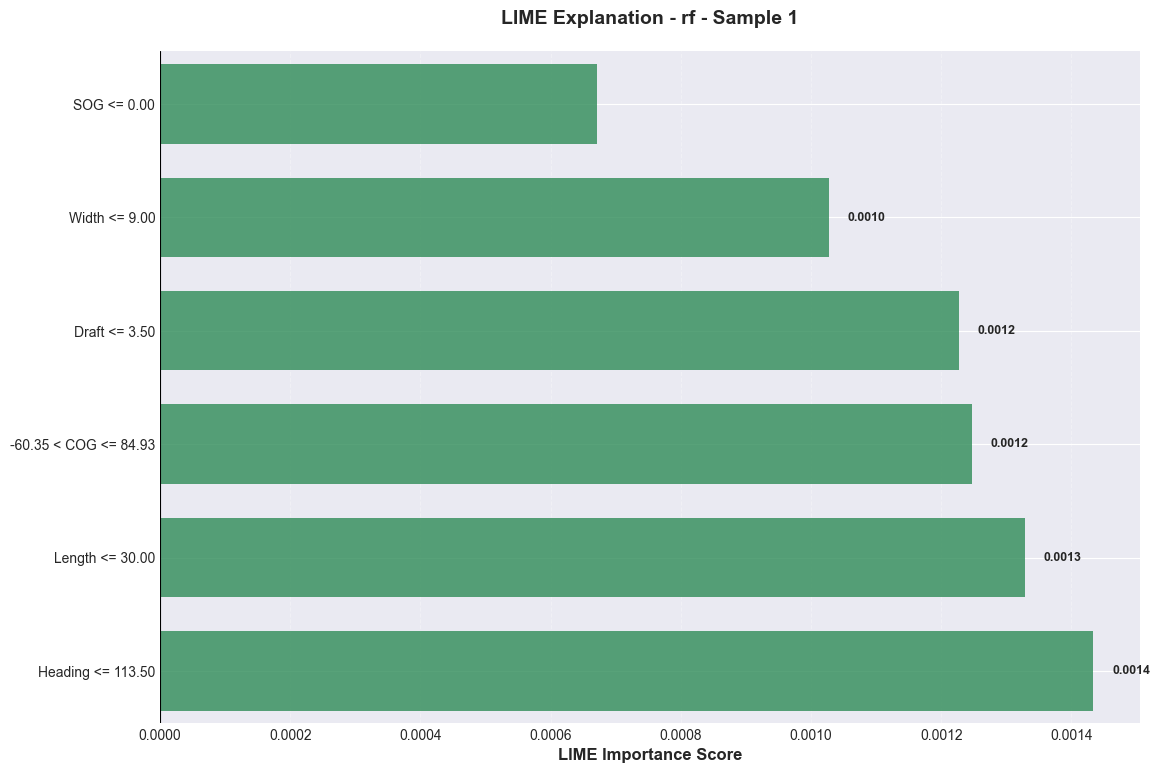


LIME Explanation for Sample 1:
------------------------------------------------------------
Explaining prediction for class: 7
Heading <= 113.50             :   0.0014
Length <= 30.00               :   0.0013
-60.35 < COG <= 84.93         :   0.0012
Draft <= 3.50                 :   0.0012
Width <= 9.00                 :   0.0010
SOG <= 0.00                   :   0.0007
------------------------------------------------------------
Predicted class: 31.0 (confidence: 1.0000)
All class probabilities: {0.0: 0.0, 10.0: 0.0, 16.0: 0.0, 19.0: 0.0, 20.0: 0.0, 25.0: 0.0, 30.0: 0.0, 31.0: 1.0, 32.0: 0.0, 33.0: 0.0, 34.0: 0.0, 36.0: 0.0, 37.0: 0.0, 38.0: 0.0, 39.0: 0.0, 40.0: 0.0, 47.0: 0.0, 49.0: 0.0, 50.0: 0.0, 51.0: 0.0, 52.0: 0.0, 53.0: 0.0, 57.0: 0.0, 60.0: 0.0, 69.0: 0.0, 70.0: 0.0, 71.0: 0.0, 73.0: 0.0, 74.0: 0.0, 76.0: 0.0, 77.0: 0.0, 79.0: 0.0, 80.0: 0.0, 81.0: 0.0, 82.0: 0.0, 84.0: 0.0, 89.0: 0.0, 90.0: 0.0, 91.0: 0.0, 99.0: 0.0, 170.0: 0.0}


Generating explanation for sample 2...
LIME

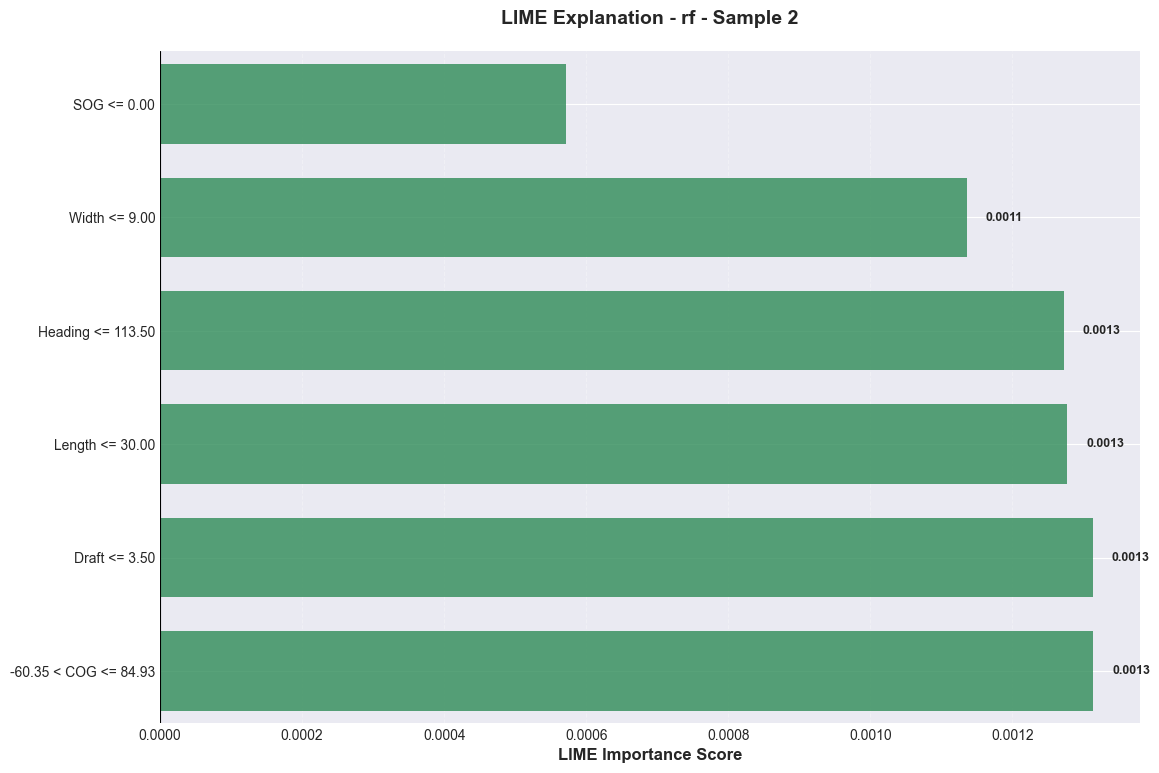


LIME Explanation for Sample 2:
------------------------------------------------------------
Explaining prediction for class: 6
-60.35 < COG <= 84.93         :   0.0013
Draft <= 3.50                 :   0.0013
Length <= 30.00               :   0.0013
Heading <= 113.50             :   0.0013
Width <= 9.00                 :   0.0011
SOG <= 0.00                   :   0.0006
------------------------------------------------------------
Predicted class: 30.0 (confidence: 1.0000)
All class probabilities: {0.0: 0.0, 10.0: 0.0, 16.0: 0.0, 19.0: 0.0, 20.0: 0.0, 25.0: 0.0, 30.0: 1.0, 31.0: 0.0, 32.0: 0.0, 33.0: 0.0, 34.0: 0.0, 36.0: 0.0, 37.0: 0.0, 38.0: 0.0, 39.0: 0.0, 40.0: 0.0, 47.0: 0.0, 49.0: 0.0, 50.0: 0.0, 51.0: 0.0, 52.0: 0.0, 53.0: 0.0, 57.0: 0.0, 60.0: 0.0, 69.0: 0.0, 70.0: 0.0, 71.0: 0.0, 73.0: 0.0, 74.0: 0.0, 76.0: 0.0, 77.0: 0.0, 79.0: 0.0, 80.0: 0.0, 81.0: 0.0, 82.0: 0.0, 84.0: 0.0, 89.0: 0.0, 90.0: 0.0, 91.0: 0.0, 99.0: 0.0, 170.0: 0.0}



Creating LIME summary visualization...
LIM

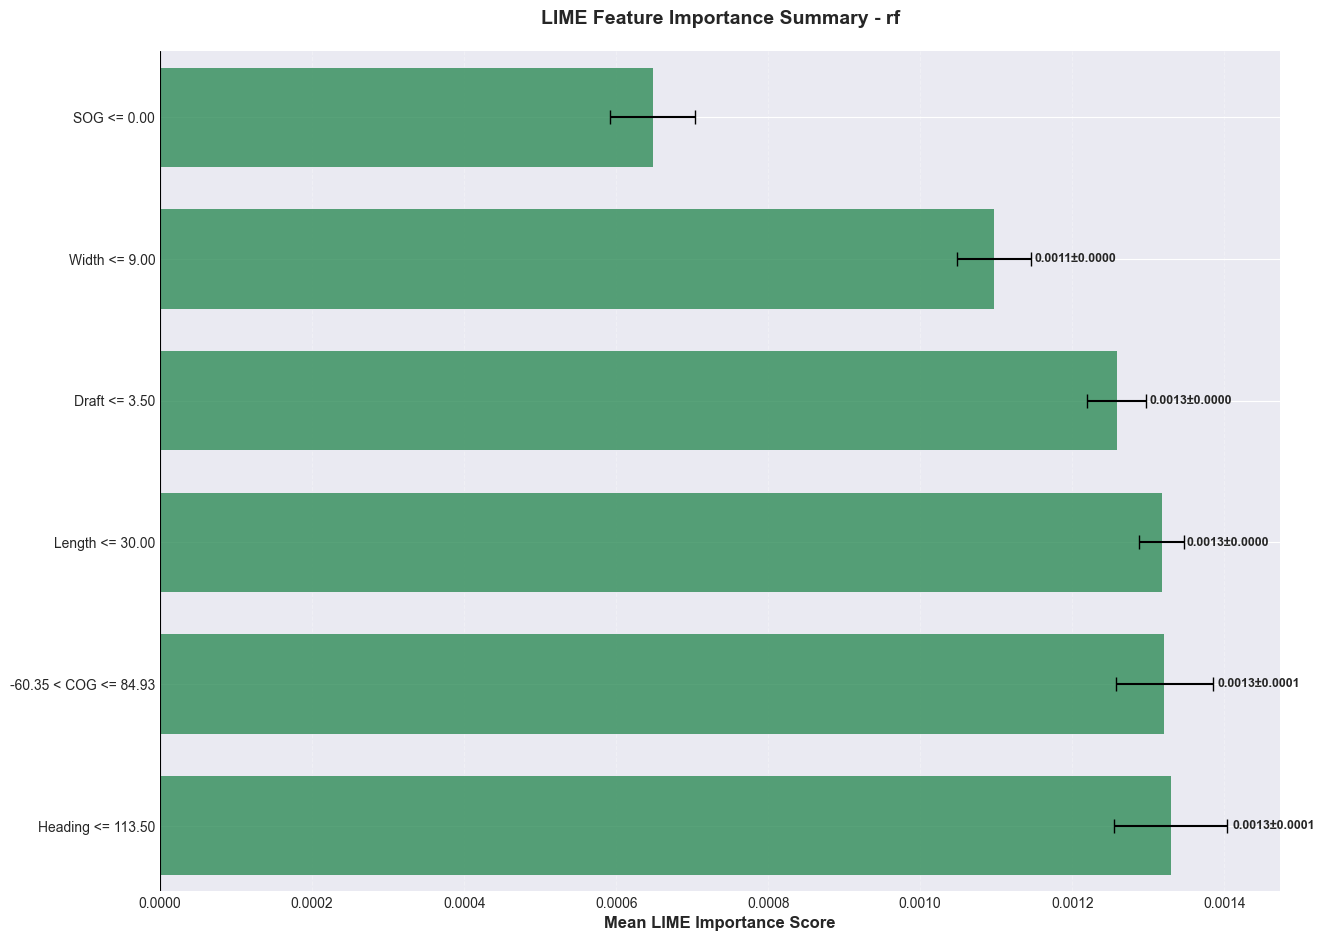

LIME summary statistics saved to: outputs\lime\lime_rf_feature_importance_summary.csv

LIME Feature Importance Summary:
----------------------------------------------------------------------
Feature                        Mean       Std        Count     
----------------------------------------------------------------------
Heading <= 113.50              0.0013     0.0001     3         
-60.35 < COG <= 84.93          0.0013     0.0001     3         
Length <= 30.00                0.0013     0.0000     3         
Draft <= 3.50                  0.0013     0.0000     3         
Width <= 9.00                  0.0011     0.0000     3         
SOG <= 0.00                    0.0006     0.0001     3         
✅ LIME analysis completed successfully!

LIME Explanation for first sample:
Predicted class: 12
Prediction probabilities: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
❌ Error in LIME analysis: 'list' object ha

Traceback (most recent call last):
  File "C:\Users\altaf\AppData\Local\Temp\ipykernel_21968\1959416172.py", line 85, in <module>
    lime_list = lime_explanation.as_list()
                ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'list' object has no attribute 'as_list'


In [52]:

# Ensure X_test is a DataFrame before sampling
X_test_df = pd.DataFrame(X_test, columns=X.columns)
X_test_sample = X_test_df.sample(5, random_state=42)

# Method 1: Complete working example
print("=== COMPLETE EXPLAINABILITY ANALYSIS ===")
print(f"Model: {type(clf).__name__}")
print(f"Training data shape: {X.shape}")
print(f"Test sample shape: {X_test_sample.shape}")
print(f"All feature names: {X.columns.tolist()}")
print(f"Number of classes: {len(le.classes_)}")
print(f"Sample of classes: {le.classes_[:10]}...")

# Test predictions first
test_pred = clf.predict(X_test_sample)
test_proba = clf.predict_proba(X_test_sample)
print(f"Test predictions: {test_pred}")
print(f"Test probabilities shape: {test_proba.shape}")

# SHAP Analysis
print("\n" + "="*50)
print("SHAP ANALYSIS")
print("="*50)
try:
    # Use a smaller sample of training data for faster SHAP computation
    X_train_sample = X.sample(min(1000, len(X)), random_state=42)
    
    shap_values = explain_model_shap(
        model=clf, 
        X_train=X_train_sample,  # Use sample for faster computation
        X_test=X_test_sample,    # Use sample for explanation
        feature_names=X.columns.tolist(), 
        save_dir="outputs", 
        model_name="rf"
    )
    
    print("✅ SHAP analysis completed successfully!")
    print(f"SHAP values shape: {shap_values.shape}")
    
    # Additional SHAP analysis
    if len(shap_values.shape) > 2:
        print(f"Multi-class model detected with {shap_values.shape[2]} classes")
        
        # Show top features for each class
        for class_idx in range(min(3, shap_values.shape[2])):  # Show first 3 classes
            class_shap = shap_values[:, :, class_idx]
            mean_shap = np.mean(np.abs(class_shap.values), axis=0)
            top_features = np.argsort(mean_shap)[-5:][::-1]
            
            print(f"\nTop 5 features for class {le.classes_[class_idx]}:")
            for i, feat_idx in enumerate(top_features):
                print(f"  {i+1}. {X.columns[feat_idx]}: {mean_shap[feat_idx]:.4f}")
    
except Exception as e:
    print(f"❌ Error in SHAP analysis: {str(e)}")
    import traceback
    traceback.print_exc()

# LIME Analysis
print("\n" + "="*50)
print("LIME ANALYSIS")
print("="*50)
try:
    # Use smaller training sample for LIME too
    X_train_sample = X.sample(min(500, len(X)), random_state=42)
    
    lime_explanation = explain_model_lime(
        model=clf, 
        X_train=X_train_sample,  # Use sample for faster computation
        X_test=X_test_sample,    # Use sample for explanation
        feature_names=X.columns.tolist(), 
        class_names=le.classes_.tolist(),
        model_name="rf"
    )
    
    if lime_explanation:
        print("✅ LIME analysis completed successfully!")
        
        # Print the explanation in a readable format
        print("\nLIME Explanation for first sample:")
        print(f"Predicted class: {test_pred[0]}")
        print(f"Prediction probabilities: {test_proba[0]}")
        
        # Show feature contributions
        lime_list = lime_explanation.as_list()
        print("\nFeature contributions:")
        for feature, contribution in lime_list:
            print(f"  {feature}: {contribution:.4f}")
    
except Exception as e:
    print(f"❌ Error in LIME analysis: {str(e)}")
    import traceback
    traceback.print_exc()

# Summary and Model Insights
print("\n" + "="*50)
print("MODEL INSIGHTS SUMMARY")
print("="*50)

# Feature importance from the model itself
if hasattr(clf, 'feature_importances_'):
    feature_importance = clf.feature_importances_
    feature_names = X.columns.tolist()
    
    # Sort features by importance
    sorted_idx = np.argsort(feature_importance)[::-1]
    
    print("Top 5 most important features (Random Forest):")
    for i in range(min(5, len(sorted_idx))):
        idx = sorted_idx[i]
        print(f"  {i+1}. {feature_names[idx]}: {feature_importance[idx]:.4f}")

print(f"\nModel performance on test sample:")
print(f"  Predicted classes: {test_pred}")
print(f"  Prediction confidence (max prob): {np.max(test_proba, axis=1)}")

# Check if outputs directory exists and list files
import os
if os.path.exists("outputs"):
    output_files = os.listdir("outputs")
    print(f"\nGenerated files in outputs directory: {len(output_files)}")
    for file in output_files:
        if file.endswith(('.png', '.html')):
            print(f"  - {file}")
else:
    print("\nOutputs directory not found")

print("\n" + "="*50)
print("ANALYSIS COMPLETE")
print("="*50)